# Network Intrusion Detection System- Multinomial Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#Load test & train dataset
train1= pd.read_csv('Train.txt')
test1= pd.read_csv('Test.txt')

In [3]:
train1.head(5)

0  tcp ftp_data   SF  491   0.1  0.2  0.3  0.4  0.5 ...  0.17.1  0.03  \
0  0  udp    other   SF  146     0    0    0    0    0 ...    0.00  0.60   
1  0  tcp  private   S0    0     0    0    0    0    0 ...    0.10  0.05   
2  0  tcp     http   SF  232  8153    0    0    0    0 ...    1.00  0.00   
3  0  tcp     http   SF  199   420    0    0    0    0 ...    1.00  0.00   
4  0  tcp  private  REJ    0     0    0    0    0    0 ...    0.07  0.07   

   0.17.2  0.00.6  0.00.7  0.00.8  0.05  0.00.9   normal  20  
0    0.88    0.00    0.00    0.00   0.0    0.00   normal  15  
1    0.00    0.00    1.00    1.00   0.0    0.00  neptune  19  
2    0.03    0.04    0.03    0.01   0.0    0.01   normal  21  
3    0.00    0.00    0.00    0.00   0.0    0.00   normal  21  
4    0.00    0.00    0.00    0.00   1.0    1.00  neptune  21  

[5 rows x 43 columns]

In [4]:
test1.head(5)

0   tcp   private   REJ    0.1    0.2  0.3  0.4  0.5  0.6 ...  0.04.1  \
0  0   tcp   private   REJ      0      0    0    0    0    0 ...    0.00   
1  2   tcp  ftp_data    SF  12983      0    0    0    0    0 ...    0.61   
2  0  icmp     eco_i    SF     20      0    0    0    0    0 ...    1.00   
3  1   tcp    telnet  RSTO      0     15    0    0    0    0 ...    0.31   
4  0   tcp      http    SF    267  14515    0    0    0    0 ...    1.00   

   0.06.1  0.00.3  0.00.4  0.00.5  0.00.6  1.00.2  1.00.3  neptune  21  
0    0.06    0.00    0.00    0.00     0.0    1.00    1.00  neptune  21  
1    0.04    0.61    0.02    0.00     0.0    0.00    0.00   normal  21  
2    0.00    1.00    0.28    0.00     0.0    0.00    0.00    saint  15  
3    0.17    0.03    0.02    0.00     0.0    0.83    0.71    mscan  11  
4    0.00    0.01    0.03    0.01     0.0    0.00    0.00   normal  21  

[5 rows x 43 columns]

In [5]:
# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:',train1.shape)
print('Dimensions of the Test set:',test1.shape)

Dimensions of the Training set: (125972, 43)
Dimensions of the Test set: (22543, 43)


<b>Remaining the columns names of test & train data

In [6]:
test1.rename(columns={"0": "duration", "tcp": "protocol_type","private":"service","REJ":"flag","0.1":"Src_bytes","0.2":"dst_bytes","0.3":"land","0.4":"wrong_fragment","0.5":"Urgent","0.6":"hot","0.7":"num_failed_logins","0.8":"logged_in","0.9":"num_compromised","0.10":"root_shell","0.11":"su_attempted","0.12":"num_root","0.13":"num_file_creations","0.14":"num_shells","0.15":"num_access_files","0.16":"num_outbound_cmds","0.17":"is_host_login","0.18":"is_guest_login","229":"count","10":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","1.00":"rerror_rate","1.00.1":"srv_rerror_rate","0.04":"same_srv_rate","0.06":"diff_srv_rate","0.00.2":"srv_diff_host_rate","255":"dst_host_count","10.1":"dst_host_srv_count","0.04.1":"dst_host_same_srv_rate","0.06.1":"dst_host_diff_srv_rate","0.00.3":"dst_host_same_src_port_rate","0.00.4":"dst_host_srv_diff_host_rate","0.00.5":"dst_host_serror_rate","0.00.6":"dst_host_srv_serror_rate","1.00.2":"dst_host_rerror_rate","1.00.3":"dst_host_srv_rerror_rate","neptune":"attack","21":"last_flag"}, inplace=True)

In [7]:
train1.rename(columns={"0": "duration", "tcp": "protocol_type","ftp_data":"service","SF":"flag","491":"Src_bytes","0.1":"dst_bytes","0.2":"land","0.3":"wrong_fragment","0.4":"Urgent","0.5":"hot","0.6":"num_failed_logins","0.7":"logged_in","0.8":"num_compromised","0.9":"root_shell","0.10":"su_attempted","0.11":"num_root","0.12":"num_file_creations","0.13":"num_shells","0.14":"num_access_files","0.15":"num_outbound_cmds","0.16":"is_host_login","0.17":"is_guest_login","2":"count","2.1":"srv_count","0.00":"serror_rate","0.00.1":"srv_serror_rate","0.00.2":"rerror_rate","0.00.3":"srv_rerror_rate","1.00":"same_srv_rate","0.00.4":"diff_srv_rate","0.00.5":"srv_diff_host_rate","150":"dst_host_count","25":"dst_host_srv_count","0.17.1":"dst_host_same_srv_rate","0.03":"dst_host_diff_srv_rate","0.17.2":"dst_host_same_src_port_rate","0.00.6":"dst_host_srv_diff_host_rate","0.00.7":"dst_host_serror_rate","0.00.8":"dst_host_srv_serror_rate","0.05":"dst_host_rerror_rate","0.00.9":"dst_host_srv_rerror_rate","normal":"attack","20":"last_flag"}, inplace=True)

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(train1)

In [9]:
# Statistical Summary of train data
train1.describe()

duration     Src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         Urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised      ...        dst_host_srv_count  \
count  125972.000000    125972.000000      ...             125972.000000   
mean        0.395739         0.279253      ...                115.653725   
std         0.489011        23.942137      ...                110.702886   
min         0.000000         0.000000      ...                  0.000000   
25%         0.000000         0.000000      ...                 10.000000   
50%         0.000000         0.000000      ...                 63.000000   
75%         1.000000         0.000000      ...                255.000000   
max         1.000000      7479.000000      ...                255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125972.000000           125972.000000   
mean                 0.521244                0.082952   
std                  0.448950                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125972.000000                125972.000000   
mean                      0.148379                     0.032543   
std                       0.308998                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125972.000000             125972.000000         125972.000000   
mean               0.284455                  0.278487              0.118832   
std                0.444785                  0.445670              0.306559   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate      last_flag  
count             125972.000000  125972.000000  
mean                   0.120241      19.504056  
std                    0.319460       2.291512  
min                    0.00000

In [10]:
#As these are binary categorical variables so make their dtype into categorical form(train data)
train1['land']=  train1['land'].astype('object')
train1['logged_in']=  train1['logged_in'].astype('object')
train1['root_shell']=  train1['root_shell'].astype('object')
train1['su_attempted']=  train1['su_attempted'].astype('object')
train1['is_host_login']=  train1['is_host_login'].astype('object')
train1['is_guest_login']=  train1['is_guest_login'].astype('object')
train1['attack']=  train1['attack'].astype('object')
#As these are binary categorical variables so make their dtype into categorical form(test data)
test1['land']=  test1['land'].astype('object')
test1['logged_in']=  test1['logged_in'].astype('object')
test1['root_shell']=  test1['root_shell'].astype('object')
test1['su_attempted']=  test1['su_attempted'].astype('object')
test1['is_host_login']=  test1['is_host_login'].astype('object')
test1['is_guest_login']=  test1['is_guest_login'].astype('object')
test1['attack']=  test1['attack'].astype('object')

<b>Separating numeric & Categorical features of test & training data

In [11]:
#train data
numeric_var_names=[key for key in dict(train1.dtypes) if dict(train1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(train1.dtypes) if dict(train1.dtypes)[key] in ['object','O']]
print(numeric_var_names)
print(cat_var_names)

['duration', 'Src_bytes', 'dst_bytes', 'wrong_fragment', 'Urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']
['protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login', 'attack']


In [12]:
#test data
test_numeric_var_names=[key for key in dict(test1.dtypes) if dict(test1.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
test_cat_var_names=[key for key in dict(test1.dtypes) if dict(test1.dtypes)[key] in ['object','O']]
print(test_numeric_var_names)
print(test_cat_var_names)

['duration', 'Src_bytes', 'dst_bytes', 'wrong_fragment', 'Urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'last_flag']
['protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login', 'attack']


In [13]:
numeric_var= train1[numeric_var_names]
numeric_var.head(5)

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0         0        146          0               0       0    0   
1         0          0          0               0       0    0   
2         0        232       8153               0       0    0   
3         0        199        420               0       0    0   
4         0          0          0               0       0    0   

   num_failed_logins  num_compromised  num_root  num_file_creations  \
0                  0                0         0                   0   
1                  0                0         0                   0   
2                  0                0         0                   0   
3                  0                0         0                   0   
4                  0                0         0                   0   

     ...      dst_host_srv_count  dst_host_same_srv_rate  \
0    ...                       1                    0.00   
1    ...                      26                    0.10   
2    ...                     255                    1.00   
3    ...                     255                    1.00   
4    ...                      19                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

   last_flag  
0         15  
1         19  
2         21  
3         21  
4         21  

[5 rows x 33 columns]

In [14]:
cat_var= train1[cat_var_names]
cat_var.head(5)

protocol_type  service flag land logged_in root_shell su_attempted  \
0           udp    other   SF    0         0          0            0   
1           tcp  private   S0    0         0          0            0   
2           tcp     http   SF    0         1          0            0   
3           tcp     http   SF    0         1          0            0   
4           tcp  private  REJ    0         0          0            0   

  is_host_login is_guest_login   attack  
0             0              0   normal  
1             0              0  neptune  
2             0              0   normal  
3             0              0   normal  
4             0              0  neptune

In [15]:
# Creating Data audit Report for train data
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=numeric_var.apply(lambda x: var_summary(x)).T

In [16]:
num_summary

N  NMISS           SUM          MEAN  \
duration                     125972.0    0.0  3.617247e+07    287.146929   
Src_bytes                    125972.0    0.0  5.740179e+09  45567.100824   
dst_bytes                    125972.0    0.0  2.491634e+09  19779.271433   
wrong_fragment               125972.0    0.0  2.858000e+03      0.022688   
Urgent                       125972.0    0.0  1.400000e+01      0.000111   
hot                          125972.0    0.0  2.575000e+04      0.204411   
num_failed_logins            125972.0    0.0  1.540000e+02      0.001222   
num_compromised              125972.0    0.0  3.517800e+04      0.279253   
num_root                     125972.0    0.0  3.806800e+04      0.302194   
num_file_creations           125972.0    0.0  1.596000e+03      0.012669   
num_shells                   125972.0    0.0  5.200000e+01      0.000413   
num_access_files             125972.0    0.0  5.160000e+02      0.004096   
num_outbound_cmds            125972.0    0.0  0.000000e+00      0.000000   
count                        125972.0    0.0  1.059528e+07     84.108207   
srv_count                    125972.0    0.0  3.494223e+06     27.738093   
serror_rate                  125972.0    0.0  3.583737e+04      0.284487   
srv_serror_rate              125972.0    0.0  3.558553e+04      0.282488   
rerror_rate                  125972.0    0.0  1.511153e+04      0.119959   
srv_rerror_rate              125972.0    0.0  1.526582e+04      0.121184   
same_srv_rate                125972.0    0.0  8.325804e+04      0.660925   
diff_srv_rate                125972.0    0.0  7.942930e+03      0.063053   
srv_diff_host_rate           125972.0    0.0  1.225990e+04      0.097322   
dst_host_count               125972.0    0.0  2.294570e+07    182.149200   
dst_host_srv_count           125972.0    0.0  1.456913e+07    115.653725   
dst_host_same_srv_rate       125972.0    0.0  6.566221e+04      0.521244   
dst_host_diff_srv_rate       125972.0    0.0  1.044957e+04      0.082952   
dst_host_same_src_port_rate  125972.0    0.0  1.869156e+04      0.148379   
dst_host_srv_diff_host_rate  125972.0    0.0  4.099470e+03      0.032543   
dst_host_serror_rate         125972.0    0.0  3.583333e+04      0.284455   
dst_host_srv_serror_rate     125972.0    0.0  3.508153e+04      0.278487   
dst_host_rerror_rate         125972.0    0.0  1.496955e+04      0.118832   
dst_host_srv_rerror_rate     125972.0    0.0  1.514698e+04      0.120241   
last_flag                    125972.0    0.0  2.456965e+06     19.504056   

                             MEDIAN           STD           VAR  MIN    P1  \
duration                       0.00  2.604526e+03  6.783553e+06  0.0   0.0   
Src_bytes                     44.00  5.870354e+06  3.446106e+13  0.0   0.0   
dst_bytes                      0.00  4.021285e+06  1.617073e+13  0.0   0.0   
wrong_fragment                 0.00  2.535310e-01  6.427796e-02  0.0   0.0   
Urgent                         0.00  1.436608e-02  2.063844e-04  0.0   0.0   
hot                            0.00  2.149977e+00  4.622401e+00  0.0   0.0   
num_failed_logins              0.00  4.523932e-02  2.046596e-03  0.0   0.0   
num_compromised                0.00  2.394214e+01  5.732259e+02  0.0   0.0   
num_root                       0.00  2.439971e+01  5.953461e+02  0.0   0.0   
num_file_creations             0.00  4.839370e-01  2.341950e-01  0.0   0.0   
num_shells                     0.00  2.218122e-02  4.920064e-04  0.0   0.0   
num_access_files               0.00  9.936995e-02  9.874387e-03  0.0   0.0   
num_outbound_cmds              0.00  0.000000e+00  0.000000e+00  0.0   0.0   
count                         14.00  1.145088e+02  1.311227e+04  0.0   1.0   
srv_count                      8.00  7.263609e+01  5.276002e+03  0.0   1.0   
serror_rate                    0.00  4.464567e-01  1.993236e-01  0.0   0.0   
srv_serror_rate                0.00  4.470236e-01  1.998301e-01  0.0   0.0   
rerror_rate                    0.00  3.204366e-

In [17]:
#Handling Outliers for training data
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

numeric_var=numeric_var.apply(lambda x:outlier_capping(x))
numeric_var.apply(lambda x:var_summary(x)).T

N  NMISS           SUM        MEAN  \
duration                     125972.0    0.0  3.186200e+04    0.252929   
Src_bytes                    125972.0    0.0  2.924484e+07  232.153479   
dst_bytes                    125972.0    0.0  1.236107e+08  981.255208   
wrong_fragment               125972.0    0.0  0.000000e+00    0.000000   
Urgent                       125972.0    0.0  0.000000e+00    0.000000   
hot                          125972.0    0.0  0.000000e+00    0.000000   
num_failed_logins            125972.0    0.0  0.000000e+00    0.000000   
num_compromised              125972.0    0.0  0.000000e+00    0.000000   
num_root                     125972.0    0.0  0.000000e+00    0.000000   
num_file_creations           125972.0    0.0  0.000000e+00    0.000000   
num_shells                   125972.0    0.0  0.000000e+00    0.000000   
num_access_files             125972.0    0.0  0.000000e+00    0.000000   
num_outbound_cmds            125972.0    0.0  0.000000e+00    0.000000   
count                        125972.0    0.0  9.935253e+06   78.868741   
srv_count                    125972.0    0.0  2.587052e+06   20.536722   
serror_rate                  125972.0    0.0  3.583737e+04    0.284487   
srv_serror_rate              125972.0    0.0  3.558553e+04    0.282488   
rerror_rate                  125972.0    0.0  1.511153e+04    0.119959   
srv_rerror_rate              125972.0    0.0  1.526582e+04    0.121184   
same_srv_rate                125972.0    0.0  8.328570e+04    0.661145   
diff_srv_rate                125972.0    0.0  4.784640e+03    0.037982   
srv_diff_host_rate           125972.0    0.0  1.225990e+04    0.097322   
dst_host_count               125972.0    0.0  2.295468e+07  182.220486   
dst_host_srv_count           125972.0    0.0  1.456913e+07  115.653748   
dst_host_same_srv_rate       125972.0    0.0  6.566221e+04    0.521244   
dst_host_diff_srv_rate       125972.0    0.0  8.751190e+03    0.069469   
dst_host_same_src_port_rate  125972.0    0.0  1.869156e+04    0.148379   
dst_host_srv_diff_host_rate  125972.0    0.0  2.359700e+03    0.018732   
dst_host_serror_rate         125972.0    0.0  3.583333e+04    0.284455   
dst_host_srv_serror_rate     125972.0    0.0  3.508153e+04    0.278487   
dst_host_rerror_rate         125972.0    0.0  1.496955e+04    0.118832   
dst_host_srv_rerror_rate     125972.0    0.0  1.514698e+04    0.120241   
last_flag                    125972.0    0.0  2.473290e+06   19.633649   

                             MEDIAN          STD           VAR    MIN     P1  \
duration                       0.00     0.927551  8.603502e-01   0.00   0.00   
Src_bytes                     44.00   389.405140  1.516364e+05   0.00   0.00   
dst_bytes                      0.00  2155.667098  4.646901e+06   0.00   0.00   
wrong_fragment                 0.00     0.000000  0.000000e+00   0.00   0.00   
Urgent                         0.00     0.000000  0.000000e+00   0.00   0.00   
hot                            0.00     0.000000  0.000000e+00   0.00   0.00   
num_failed_logins              0.00     0.000000  0.000000e+00   0.00   0.00   
num_compromised                0.00     0.000000  0.000000e+00   0.00   0.00   
num_root                       0.00     0.000000  0.000000e+00   0.00   0.00   
num_file_creations             0.00     0.000000  0.000000e+00   0.00   0.00   
num_shells                     0.00     0.000000  0.000000e+00   0.00   0.00   
num_access_files               0.00     0.000000  0.000000e+00   0.00   0.00   
num_outbound_cmds              0.00     0.000000  0.000000e+00   0.00   0.00   
count                         14.00    99.716269  9.943334e+03   1.00   1.00   
srv_count                      8.00    38.665288  1.495004e+03   1.00   1.00   
serror_rate                    0.00     0.446457  1.993236e-01   0.00   0.00   
srv_serror_rate                0.00     0.447024  1.998301e-01   0.00   0.00   
rerror_rate                    0.00     0.320437  1.026796e-01   0.00   0.00   

In [18]:
numeric_var.corr()

duration  Src_bytes  dst_bytes  wrong_fragment  \
duration                     1.000000   0.228232   0.037962             NaN   
Src_bytes                    0.228232   1.000000   0.191875             NaN   
dst_bytes                    0.037962   0.191875   1.000000             NaN   
wrong_fragment                    NaN        NaN        NaN             NaN   
Urgent                            NaN        NaN        NaN             NaN   
hot                               NaN        NaN        NaN             NaN   
num_failed_logins                 NaN        NaN        NaN             NaN   
num_compromised                   NaN        NaN        NaN             NaN   
num_root                          NaN        NaN        NaN             NaN   
num_file_creations                NaN        NaN        NaN             NaN   
num_shells                        NaN        NaN        NaN             NaN   
num_access_files                  NaN        NaN        NaN             NaN   
num_outbound_cmds                 NaN        NaN        NaN             NaN   
count                       -0.198642  -0.302551  -0.324455             NaN   
srv_count                   -0.131913  -0.002766  -0.118399             NaN   
serror_rate                 -0.168926  -0.364699  -0.269928             NaN   
srv_serror_rate             -0.168476  -0.363742  -0.269064             NaN   
rerror_rate                  0.062925  -0.203532  -0.150900             NaN   
srv_rerror_rate              0.059814  -0.197222  -0.143122             NaN   
same_srv_rate                0.162331   0.423370   0.346198             NaN   
diff_srv_rate               -0.021623  -0.231432  -0.235271             NaN   
srv_diff_host_rate           0.039698   0.159765   0.019238             NaN   
dst_host_count              -0.028181  -0.208827  -0.263079             NaN   
dst_host_srv_count          -0.144178   0.191380   0.423552             NaN   
dst_host_same_srv_rate      -0.113704   0.234334   0.411116             NaN   
dst_host_diff_srv_rate       0.323968  -0.107489  -0.202184             NaN   
dst_host_same_src_port_rate  0.202433   0.054710  -0.115146             NaN   
dst_host_srv_diff_host_rate -0.045047  -0.047686   0.031974             NaN   
dst_host_serror_rate        -0.159122  -0.348645  -0.275917             NaN   
dst_host_srv_serror_rate    -0.158389  -0.359774  -0.274154             NaN   
dst_host_rerror_rate         0.050867  -0.190271  -0.155163             NaN   
dst_host_srv_rerror_rate     0.059699  -0.199066  -0.139574             NaN   
last_flag                   -0.069368   0.053253   0.171274             NaN   

                             Urgent  hot  num_failed_logins  num_compromised  \
duration                        NaN  NaN                NaN              NaN   
Src_bytes                       NaN  NaN                NaN              NaN   
dst_bytes                       NaN  NaN                NaN              NaN   
wrong_fragment                  NaN  NaN                NaN              NaN   
Urgent                          NaN  NaN                NaN              NaN   
hot                             NaN  NaN                NaN              NaN   
num_failed_logins               NaN  NaN                NaN              NaN   
num_compromised                 NaN  NaN                NaN              NaN   
num_root                        NaN  NaN                NaN              NaN   
num_file_creations              NaN  NaN                NaN              NaN   
num_shells                      NaN  NaN                NaN              NaN   
num_access_files                NaN  NaN                NaN              NaN   
num_outbound_cmds               NaN  NaN                NaN              NaN   
count                           NaN  NaN                NaN              NaN   
srv_count                       NaN  NaN                NaN              NaN   
serror_rate                     NaN  NaN                NaN   

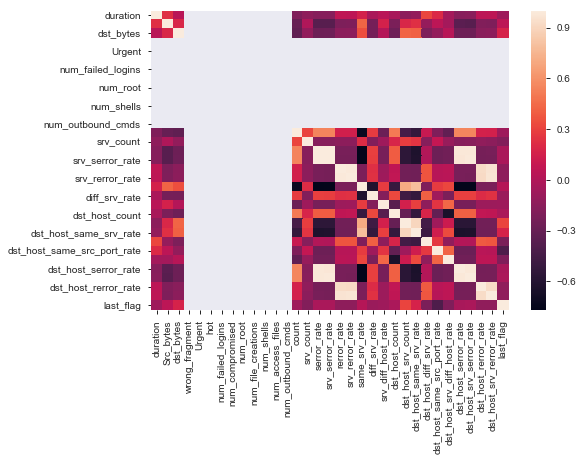

In [19]:
sns.heatmap(numeric_var.corr())

It seems that most of the variable showing NAN value that means they contain more then 99% Zeros. We will remove it later during Feature engineering as they are not valauable.

In [20]:
train_cat=train1[['protocol_type','flag','service']]
train_cat.head(5)

protocol_type flag  service
0           udp   SF    other
1           tcp   S0  private
2           tcp   SF     http
3           tcp   SF     http
4           tcp  REJ  private

In [21]:
# An utility function to create dummy variable for train data
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [22]:
train_cat=train1[['protocol_type','flag','service']]

for c_feature in ['protocol_type','flag','service']:
    train_cat[c_feature] = train_cat[c_feature].astype('category')
    train_cat=create_dummies(train_cat , c_feature)
train_cat

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  \
0                       0                  1         0          0   
1                       1                  0         0          0   
2                       1                  0         0          0   
3                       1                  0         0          0   
4                       1                  0         1          0   
5                       1                  0         0          0   
6                       1                  0         0          0   
7                       1                  0         0          0   
8                       1                  0         0          0   
9                       1                  0         1          0   
10                      1                  0         0          0   
11                      1                  0         0          0   
12                      1                  0         0          0   
13                      1                  0         0          0   
14                      1                  0         0          0   
15                      1                  0         0          0   
16                      0                  0         0          0   
17                      1                  0         0          0   
18                      1                  0         0          0   
19                      1                  0         0          0   
20                      1                  0         0          0   
21                      1                  0         0          0   
22                      0                  1         0          0   
23                      1                  0         0          0   
24                      1                  0         0          0   
25                      1                  0         0          0   
26                      1                  0         0          0   
27                      1                  0         0          0   
28                      1                  0         0          0   
29                      0                  0         0          0   
...                   ...                ...       ...        ...   
125942                  1                  0         0          0   
125943                  1                  0         0          0   
125944                  1                  0         0          0   
125945                  1                  0         0          0   
125946                  0                  0         0          0   
125947                  1                  0         0          0   
125948                  1                  0         1          0   
125949                  0                  1         0          0   
125950                  1                  0         0          0   
125951                  1                  0         0          0   
125952                  1                  0         0          0   
125953                  1                  0         0          0   
125954                  1                  0         1          0   
125955                  0                  0         0          0   
125956                  1                  0         0          0   
125957                  1                  0         0          0   
125958                  1                  0         0          0   
125959                  1                  0         0          0   
125960                  1                  0         0          0   
125961                  0                  1         0          0   
125962                  1                  0         0          0   
125963                  1                  0         0          0   
125964                  1                  0         0          0   
125965                  1                  0         0          0   
125966                  1                  0         0          0   
125967                  1                  0         0          0   
125968

In [23]:
#Creating a single dataframe for all Categorical varibles of train data
train_cat_data=pd.concat([train_cat,train1[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login','attack']]],axis=1)
train_cat_data

protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  \
0                       0                  1         0          0   
1                       1                  0         0          0   
2                       1                  0         0          0   
3                       1                  0         0          0   
4                       1                  0         1          0   
5                       1                  0         0          0   
6                       1                  0         0          0   
7                       1                  0         0          0   
8                       1                  0         0          0   
9                       1                  0         1          0   
10                      1                  0         0          0   
11                      1                  0         0          0   
12                      1                  0         0          0   
13                      1                  0         0          0   
14                      1                  0         0          0   
15                      1                  0         0          0   
16                      0                  0         0          0   
17                      1                  0         0          0   
18                      1                  0         0          0   
19                      1                  0         0          0   
20                      1                  0         0          0   
21                      1                  0         0          0   
22                      0                  1         0          0   
23                      1                  0         0          0   
24                      1                  0         0          0   
25                      1                  0         0          0   
26                      1                  0         0          0   
27                      1                  0         0          0   
28                      1                  0         0          0   
29                      0                  0         0          0   
...                   ...                ...       ...        ...   
125942                  1                  0         0          0   
125943                  1                  0         0          0   
125944                  1                  0         0          0   
125945                  1                  0         0          0   
125946                  0                  0         0          0   
125947                  1                  0         0          0   
125948                  1                  0         1          0   
125949                  0                  1         0          0   
125950                  1                  0         0          0   
125951                  1                  0         0          0   
125952                  1                  0         0          0   
125953                  1                  0         0          0   
125954                  1                  0         1          0   
125955                  0                  0         0          0   
125956                  1                  0         0          0   
125957                  1                  0         0          0   
125958                  1                  0         0          0   
125959                  1                  0         0          0   
125960                  1                  0         0          0   
125961                  0                  1         0          0   
125962                  1                  0         0          0   
125963                  1                  0         0          0   
125964                  1                  0         0          0   
125965                  1                  0         0          0   
125966                  1                  0         0          0   
125967                  1                  0         0          0   
125968

In [24]:
#Combining numeric and categorical variables and create a single dataframe for training data
train_set= pd.concat([numeric_var,train_cat_data], axis=1)
train_set

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0            0.0      146.0        0.0             0.0     0.0  0.0   
1            0.0        0.0        0.0             0.0     0.0  0.0   
2            0.0      232.0     8153.0             0.0     0.0  0.0   
3            0.0      199.0      420.0             0.0     0.0  0.0   
4            0.0        0.0        0.0             0.0     0.0  0.0   
5            0.0        0.0        0.0             0.0     0.0  0.0   
6            0.0        0.0        0.0             0.0     0.0  0.0   
7            0.0        0.0        0.0             0.0     0.0  0.0   
8            0.0        0.0        0.0             0.0     0.0  0.0   
9            0.0        0.0        0.0             0.0     0.0  0.0   
10           0.0        0.0        0.0             0.0     0.0  0.0   
11           0.0      287.0     2251.0             0.0     0.0  0.0   
12           0.0      334.0        0.0             0.0     0.0  0.0   
13           0.0        0.0        0.0             0.0     0.0  0.0   
14           0.0        0.0        0.0             0.0     0.0  0.0   
15           0.0      300.0     8314.0             0.0     0.0  0.0   
16           0.0       18.0        0.0             0.0     0.0  0.0   
17           0.0      233.0      616.0             0.0     0.0  0.0   
18           0.0      343.0     1178.0             0.0     0.0  0.0   
19           0.0        0.0        0.0             0.0     0.0  0.0   
20           0.0        0.0        0.0             0.0     0.0  0.0   
21           0.0      253.0     8314.0             0.0     0.0  0.0   
22           4.0      147.0      105.0             0.0     0.0  0.0   
23           0.0        0.0        0.0             0.0     0.0  0.0   
24           4.0      437.0     8314.0             0.0     0.0  0.0   
25           0.0        0.0        0.0             0.0     0.0  0.0   
26           0.0      227.0     6588.0             0.0     0.0  0.0   
27           0.0      215.0     8314.0             0.0     0.0  0.0   
28           0.0      241.0     1400.0             0.0     0.0  0.0   
29           0.0        8.0        0.0             0.0     0.0  0.0   
...          ...        ...        ...             ...     ...  ...   
125942       0.0      491.0        0.0             0.0     0.0  0.0   
125943       1.0     1480.0      362.0             0.0     0.0  0.0   
125944       0.0      247.0      799.0             0.0     0.0  0.0   
125945       0.0        0.0        0.0             0.0     0.0  0.0   
125946       0.0       18.0        0.0             0.0     0.0  0.0   
125947       0.0        0.0        0.0             0.0     0.0  0.0   
125948       0.0        0.0        0.0             0.0     0.0  0.0   
125949       0.0       28.0        0.0             0.0     0.0  0.0   
125950       0.0      254.0      555.0             0.0     0.0  0.0   
125951       0.0     1289.0      408.0             0.0     0.0  0.0   
125952       0.0        0.0        0.0             0.0     0.0  0.0   
125953       0.0      269.0     8314.0             0.0     0.0  0.0   
125954       0.0        0.0        0.0             0.0     0.0  0.0   
125955       0.0       30.0        0.0             0.0     0.0  0.0   
125956       1.0     1247.0      327.0             0.0     0.0  0.0   
125957       0.0        0.0        0.0             0.0     0.0  0.0   
125958       0.0      373.0     4777.0             0.0     0.0  0.0   
125959       0.0      329.0      885.0             0.0     0.0  0.0   
125960       0.0      236.0     2698.0             0.0     0.0  0.0   
125961       0.0       33.0        0.0             0.0     0.0  0.0   
125962       0.0      334.0     1600.0             0.0     0.0  0.0   
125963       0.0        0.0        0.0             0.0     0.0  0.0   
125964       0.0     1480.0      365.0             0.0     0.0  0.0   
125965       0.0        0.0        0.0             0.0     0.0  0.0   
125966       0.0      359.0     

In [25]:
test_numeric_var= test1[test_numeric_var_names]
test_numeric_var.head(5)

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0         0          0          0               0       0    0   
1         2      12983          0               0       0    0   
2         0         20          0               0       0    0   
3         1          0         15               0       0    0   
4         0        267      14515               0       0    0   

   num_failed_logins  num_compromised  num_root  num_file_creations  \
0                  0                0         0                   0   
1                  0                0         0                   0   
2                  0                0         0                   0   
3                  0                0         0                   0   
4                  0                0         0                   0   

     ...      dst_host_srv_count  dst_host_same_srv_rate  \
0    ...                       1                    0.00   
1    ...                      86                    0.61   
2    ...                      57                    1.00   
3    ...                      86                    0.31   
4    ...                     255                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.04                         0.61   
2                    0.00                         1.00   
3                    0.17                         0.03   
4                    0.00                         0.01   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.02                  0.00   
2                         0.28                  0.00   
3                         0.02                  0.00   
4                         0.03                  0.01   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  0.00                      0.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.83                      0.71   
4                       0.0                  0.00                      0.00   

   last_flag  
0         21  
1         21  
2         15  
3         11  
4         21  

[5 rows x 33 columns]

In [26]:
test_cat_var= test1[test_cat_var_names]
test_cat_var.head(5)

protocol_type   service  flag land logged_in root_shell su_attempted  \
0           tcp   private   REJ    0         0          0            0   
1           tcp  ftp_data    SF    0         0          0            0   
2          icmp     eco_i    SF    0         0          0            0   
3           tcp    telnet  RSTO    0         0          0            0   
4           tcp      http    SF    0         1          0            0   

  is_host_login is_guest_login   attack  
0             0              0  neptune  
1             0              0   normal  
2             0              0    saint  
3             0              0    mscan  
4             0              0   normal

In [27]:
test_cat_var=test1[['protocol_type','flag','service']]
test_cat_var.head(5)

protocol_type  flag   service
0           tcp   REJ   private
1           tcp    SF  ftp_data
2          icmp    SF     eco_i
3           tcp  RSTO    telnet
4           tcp    SF      http

In [28]:
# An utility function to create dummy variable for test data
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [29]:
test_cat_var=test1[['protocol_type','flag','service']]

for c_feature in ['protocol_type','flag','service']:
    test_cat_var[c_feature] = test_cat_var[c_feature].astype('category')
    test_cat_var=create_dummies(test_cat_var , c_feature)
test_cat_var

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  flag_RSTOS0  \
0                      1                  0         1          0            0   
1                      1                  0         0          0            0   
2                      0                  0         0          0            0   
3                      1                  0         0          1            0   
4                      1                  0         0          0            0   
5                      1                  0         0          0            0   
6                      1                  0         0          0            0   
7                      1                  0         0          0            0   
8                      1                  0         0          0            0   
9                      1                  0         0          0            0   
10                     1                  0         0          0            0   
11                     1                  0         1          0            0   
12                     1                  0         0          0            0   
13                     1                  0         0          0            0   
14                     1                  0         0          0            0   
15                     1                  0         0          0            0   
16                     1                  0         0          0            0   
17                     0                  1         0          0            0   
18                     1                  0         1          0            0   
19                     1                  0         1          0            0   
20                     1                  0         0          0            0   
21                     1                  0         0          0            0   
22                     1                  0         0          0            0   
23                     1                  0         1          0            0   
24                     1                  0         0          1            0   
25                     1                  0         0          0            0   
26                     1                  0         0          0            0   
27                     0                  0         0          0            0   
28                     0                  1         0          0            0   
29                     1                  0         0          0            0   
...                  ...                ...       ...        ...          ...   
22513                  0                  1         0          0            0   
22514                  1                  0         0          0            0   
22515                  1                  0         0          0            0   
22516                  1                  0         0          0            0   
22517                  1                  0         0          0            0   
22518                  1                  0         0          0            0   
22519                  1                  0         1          0            0   
22520                  0                  1         0          0            0   
22521                  1                  0         0          0            0   
22522                  1                  0         0          0            0   
22523                  1                  0         0          0            0   
22524                  1                  0         0          0            0   
22525                  1                  0         0          0            0   
22526                  1                  0         0          0            0   
22527                  0                  0         0          0            0   
22528                  1                  0         0          0            0   
22529                  1                  0         0          0            0   
22530                  1              

In [30]:
test_cat_data=pd.concat([test_cat_var,test1[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login','attack']]],axis=1)
test_cat_data

protocol_type_tcp  protocol_type_udp  flag_REJ  flag_RSTO  flag_RSTOS0  \
0                      1                  0         1          0            0   
1                      1                  0         0          0            0   
2                      0                  0         0          0            0   
3                      1                  0         0          1            0   
4                      1                  0         0          0            0   
5                      1                  0         0          0            0   
6                      1                  0         0          0            0   
7                      1                  0         0          0            0   
8                      1                  0         0          0            0   
9                      1                  0         0          0            0   
10                     1                  0         0          0            0   
11                     1                  0         1          0            0   
12                     1                  0         0          0            0   
13                     1                  0         0          0            0   
14                     1                  0         0          0            0   
15                     1                  0         0          0            0   
16                     1                  0         0          0            0   
17                     0                  1         0          0            0   
18                     1                  0         1          0            0   
19                     1                  0         1          0            0   
20                     1                  0         0          0            0   
21                     1                  0         0          0            0   
22                     1                  0         0          0            0   
23                     1                  0         1          0            0   
24                     1                  0         0          1            0   
25                     1                  0         0          0            0   
26                     1                  0         0          0            0   
27                     0                  0         0          0            0   
28                     0                  1         0          0            0   
29                     1                  0         0          0            0   
...                  ...                ...       ...        ...          ...   
22513                  0                  1         0          0            0   
22514                  1                  0         0          0            0   
22515                  1                  0         0          0            0   
22516                  1                  0         0          0            0   
22517                  1                  0         0          0            0   
22518                  1                  0         0          0            0   
22519                  1                  0         1          0            0   
22520                  0                  1         0          0            0   
22521                  1                  0         0          0            0   
22522                  1                  0         0          0            0   
22523                  1                  0         0          0            0   
22524                  1                  0         0          0            0   
22525                  1                  0         0          0            0   
22526                  1                  0         0          0            0   
22527                  0                  0         0          0            0   
22528                  1                  0         0          0            0   
22529                  1                  0         0          0            0   
22530                  1              

In [31]:
#Combining numeric and categorical variables and create a single dataframe for test data
test_set= pd.concat([test_numeric_var,test_cat_data], axis=1)
test_set

duration  Src_bytes  dst_bytes  wrong_fragment  Urgent  hot  \
0             0          0          0               0       0    0   
1             2      12983          0               0       0    0   
2             0         20          0               0       0    0   
3             1          0         15               0       0    0   
4             0        267      14515               0       0    0   
5             0       1022        387               0       0    0   
6             0        129        174               0       0    0   
7             0        327        467               0       0    0   
8             0         26        157               0       0    0   
9             0          0          0               0       0    0   
10            0        616        330               0       0    0   
11            0          0          0               0       0    0   
12            0          0          0               0       0    0   
13           37        773     364200               0       0    0   
14            0        350       3610               0       0    0   
15            0        213        659               0       0    0   
16            0        246       2090               0       0    0   
17            0         45         44               0       0    0   
18            0          0          0               0       0    0   
19            0          0          0               0       0    0   
20            0          0          0               0       0    0   
21            0        196       1823               0       0    0   
22            0        277       1816               0       0    0   
23            0          0          0               0       0    0   
24            0          0          0               0       0    0   
25            0        294       6442               0       0    0   
26            0        300        440               0       0    0   
27            0        520          0               0       0    0   
28            0         54         51               0       0    0   
29          805      76944          1               0       0    0   
...         ...        ...        ...             ...     ...  ...   
22513         0        115          0               0       0    0   
22514         0          0          0               0       0    0   
22515         0        322        396               0       0    0   
22516      7498          0         44               0       0    0   
22517         0        295        757               0       0    0   
22518      8209          0         15               0       0    0   
22519         0          0          0               0       0    0   
22520         0          1          1               0       0    0   
22521         0      54540       8314               0       0    2   
22522         0        289       9522               0       0    0   
22523        15         45        214               0       0    0   
22524      2064      55744          0               0       0    0   
22525         0        169       4997               0       0    0   
22526         0        236      16257               0       0    0   
22527         0       1032          0               0       0    0   
22528         0          9        139               0       0    0   
22529         0          0          0               0       0    0   
22530         0          0          0               0       0    0   
22531         0        264      14839               0       0    0   
22532         0        274       1623               0       0    0   
22533         0          0          0               0       0    0   
22534         0        280       6087               0       0    0   
22535         0          0          0               0       0    0   
22536         1       2599        293               0       0    0   
22537         0       1032          0               0       0    0   
22538         0  

<b>Split Dataset into 4 datasets for every attack category .Rename every attack label: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.

In [32]:
attack_train= train_set['attack']
attack_test= test_set['attack']

# change the label column
newattack_train=attack_train.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                          'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})


newattack_test=attack_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                          ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

# put the new attack column back
train_set['attack'] = newattack_train
test_set['attack'] = newattack_test
#print(test_set['attack'].head())

<b> Distribution of attacks types and normal in train data

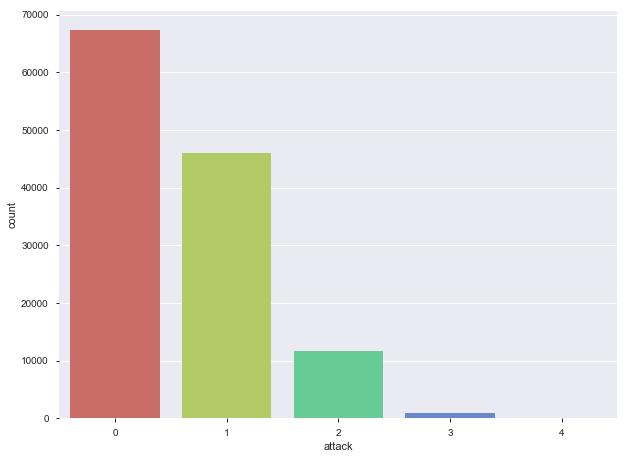

In [197]:
sns.countplot(x='attack',data=train_set, palette='hls')
plt.show()

Here ,0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R
It is noted that there is no any connection attack by U2R as is negligible,non attack connections are in maximum number.

<b>Distribution of attack types and non attack(normal) in test data set

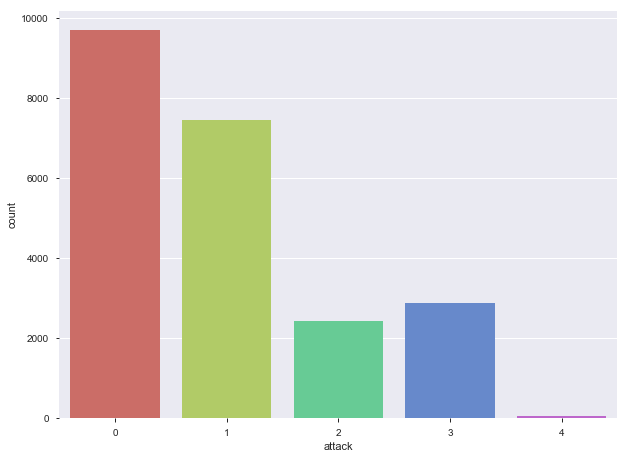

In [198]:
sns.countplot(x='attack',data=test_set, palette='hls')
plt.show()

Non attack or normal connections maximum in number and maximum number of attacks caused by DoS and minimum by U2R.

In [33]:
print(train_set['attack'].head())

0    0
1    1
2    0
3    0
4    1
Name: attack, dtype: int64


<b>Dropping Columns based on:

-Based on low variance (near zero variance)
-High missings (>25% missings)
-High correlations between two numerical variables

In [34]:
#num_outbound_cmds is redundant feature contains 100% 0 value so removing it
train_set.drop(['num_outbound_cmds'], axis=1, inplace= True)
train_set.drop(['num_file_creations','num_failed_logins','num_compromised','num_access_files','hot'], axis=1, inplace= True)
train_set.drop(['rerror_rate','serror_rate'], axis=1, inplace= True)
train_set.drop(['dst_host_srv_rerror_rate','dst_host_srv_serror_rate'], axis=1, inplace= True)

In [35]:
train_set.drop(['num_root','num_shells','Urgent'], axis=1, inplace= True)

<b>Variable reduction using WOE or log(odds)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
C:\Users\Aanchal\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


<Figure size 720x540 with 0 Axes>

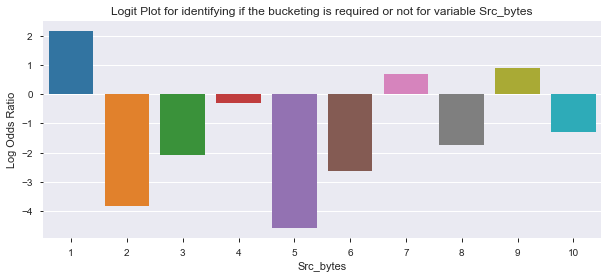

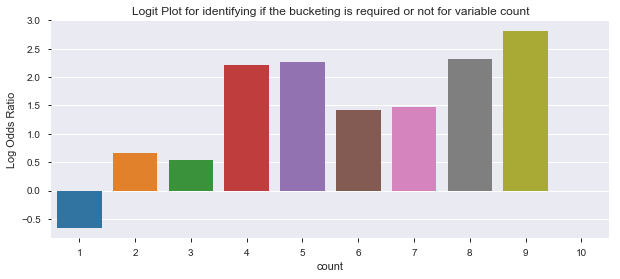

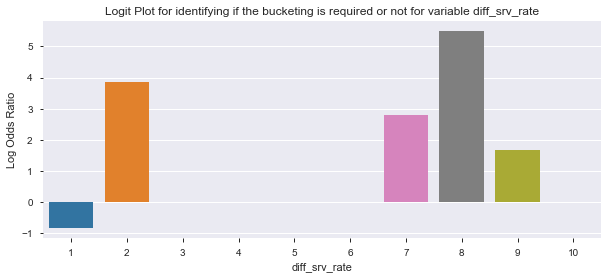

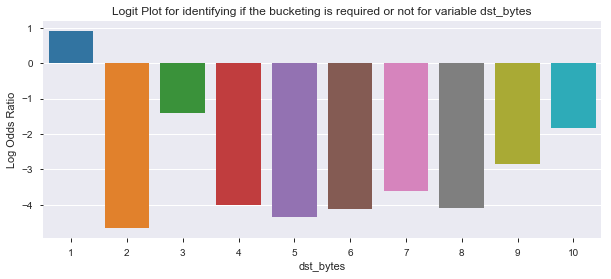

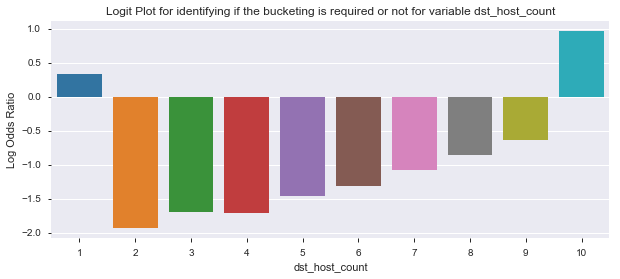

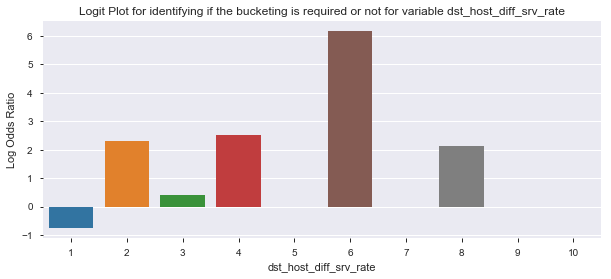

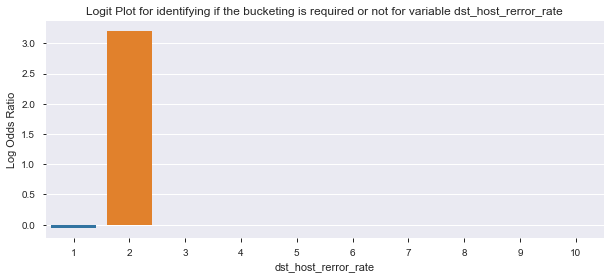

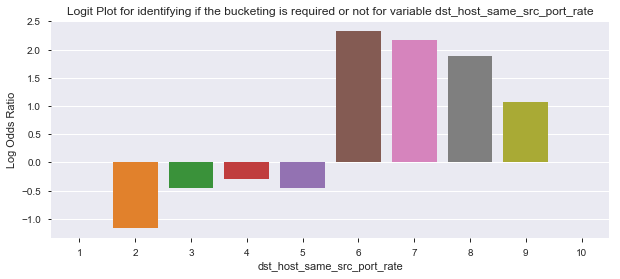

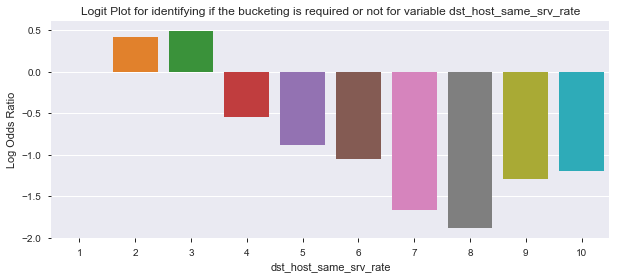

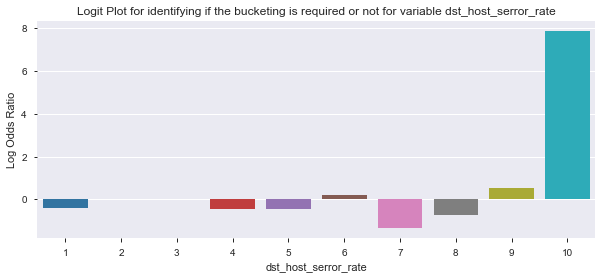

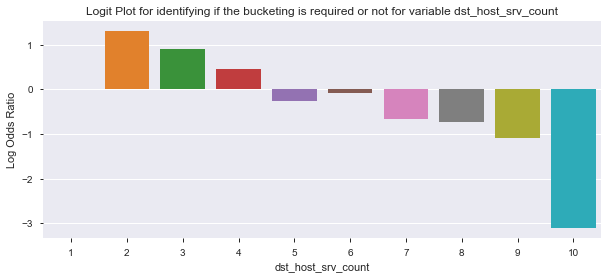

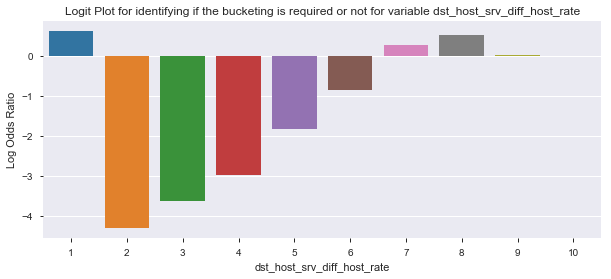

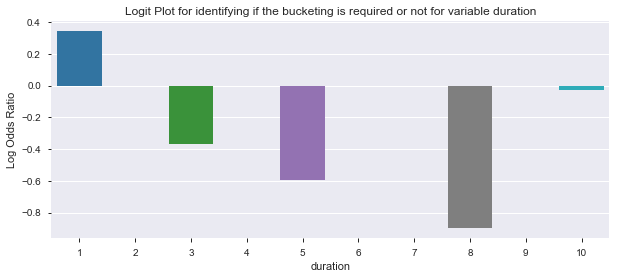

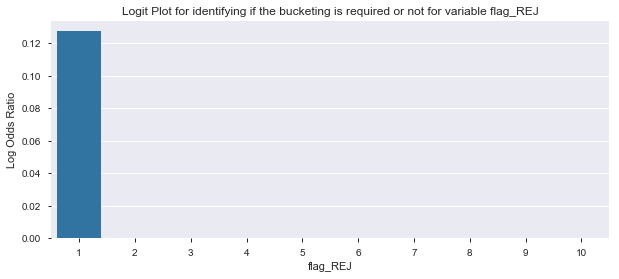

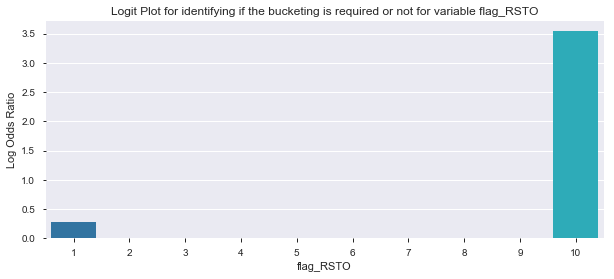

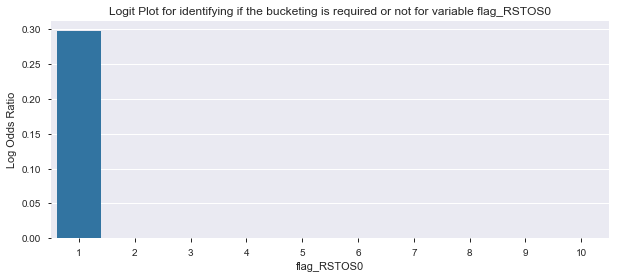

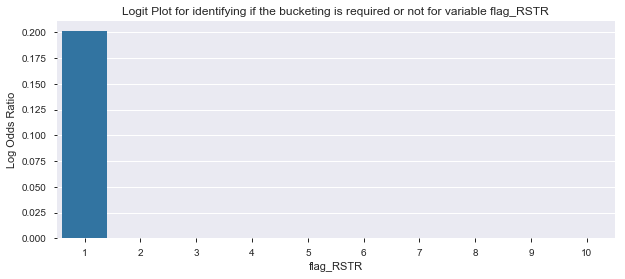

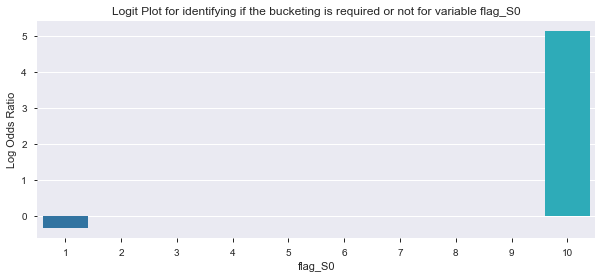

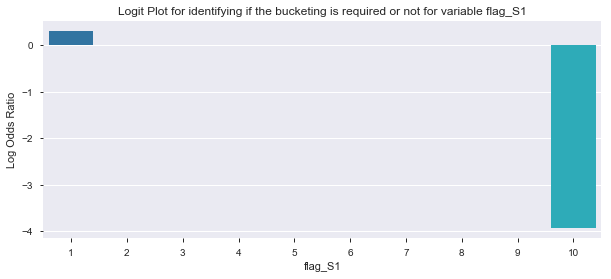

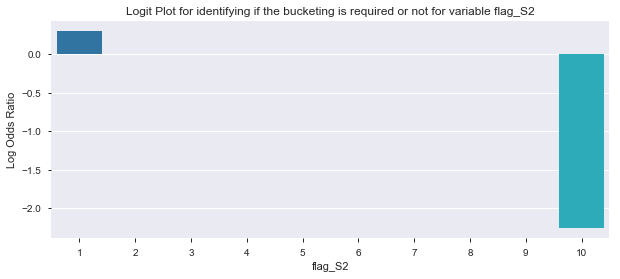

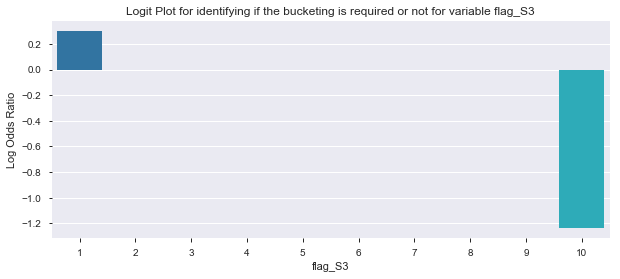

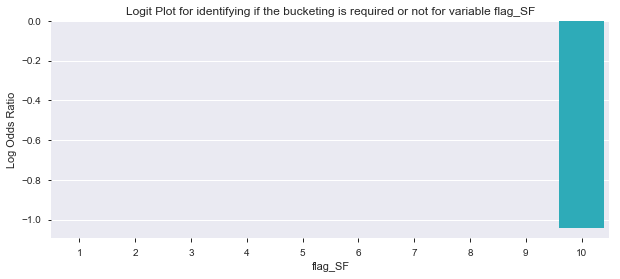

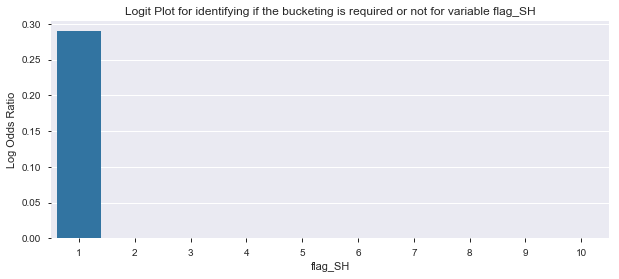

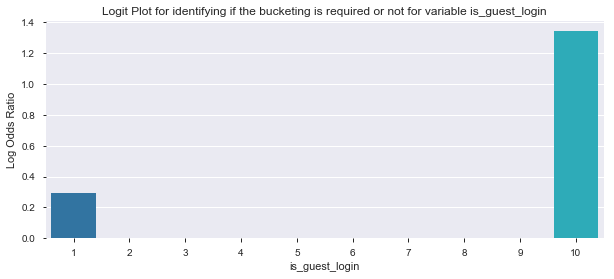

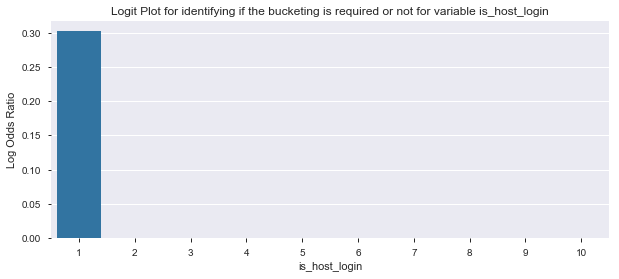

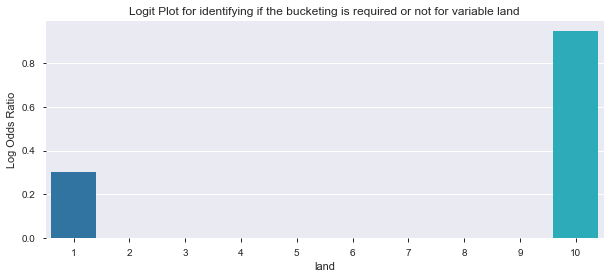

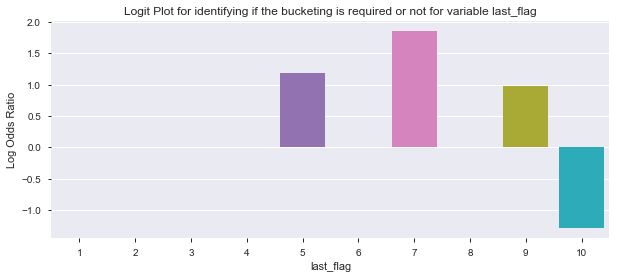

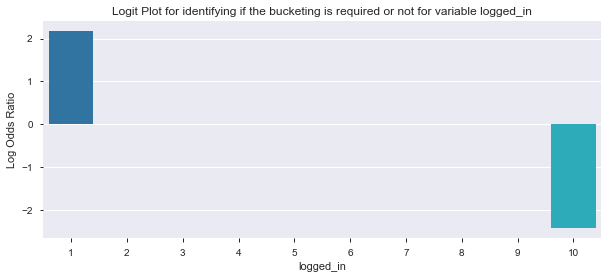

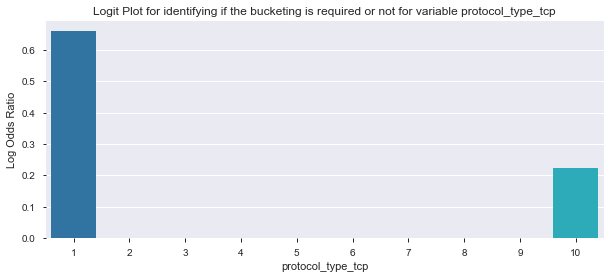

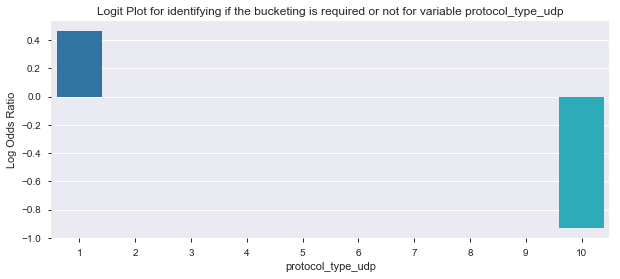

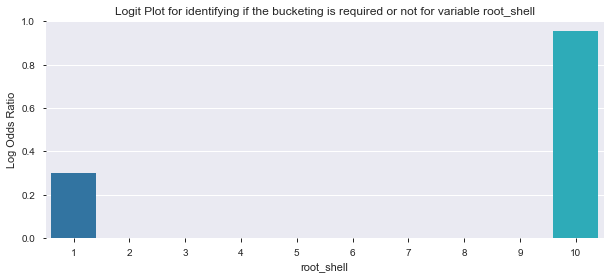

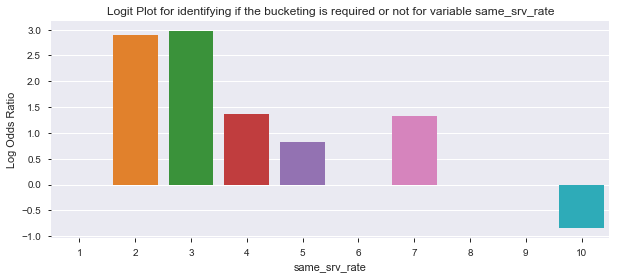

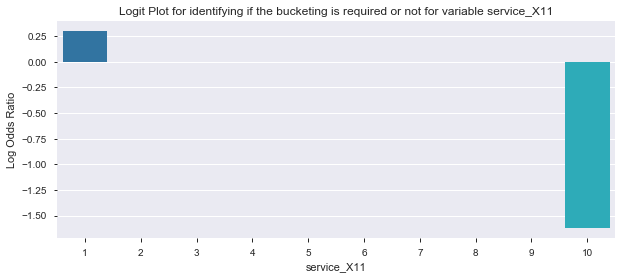

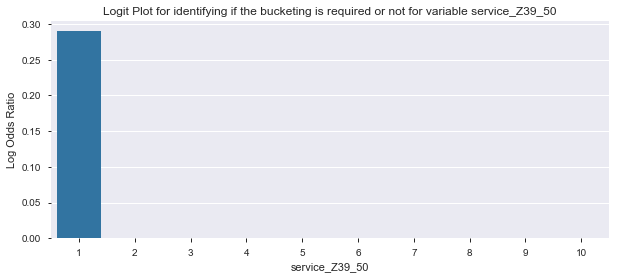

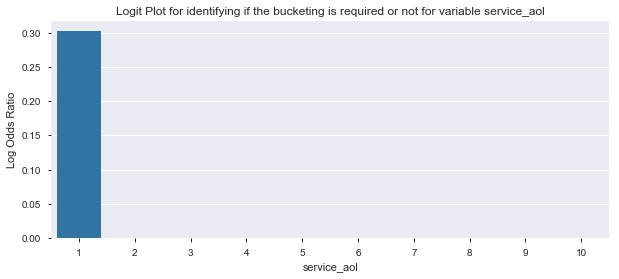

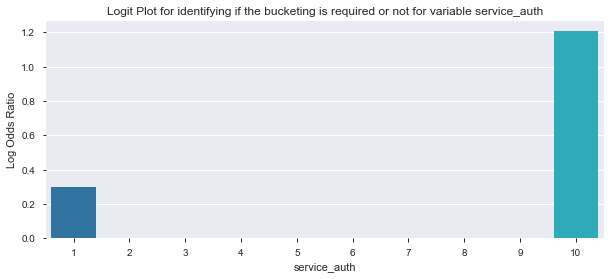

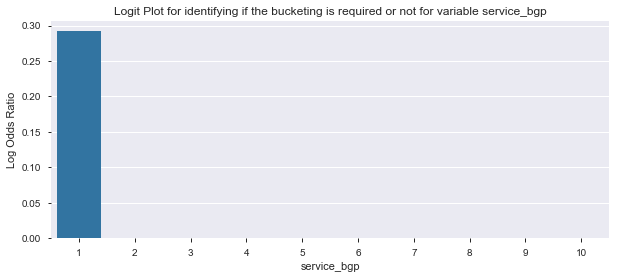

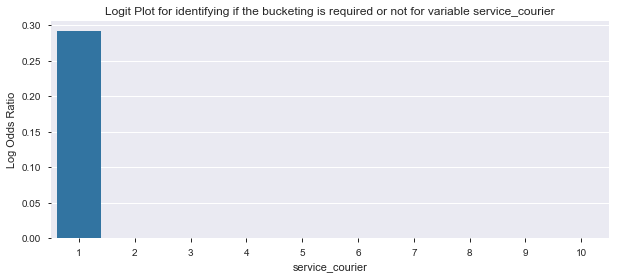

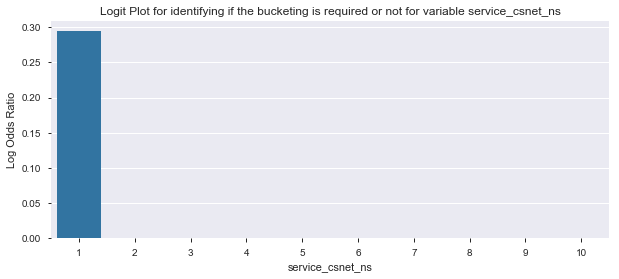

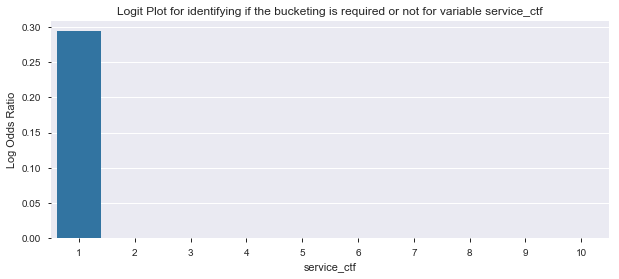

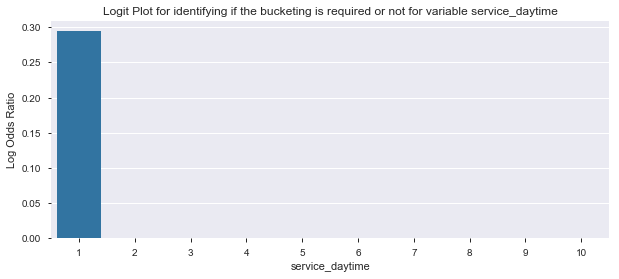

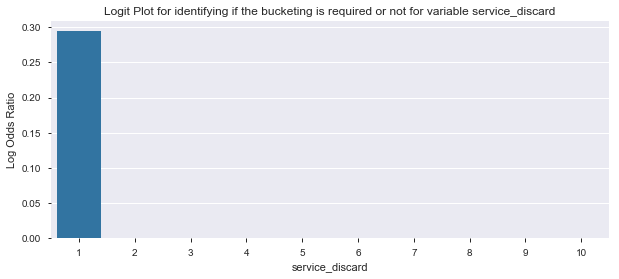

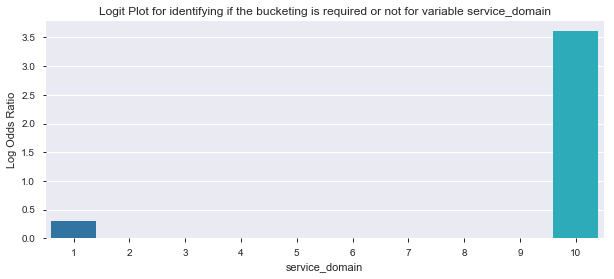

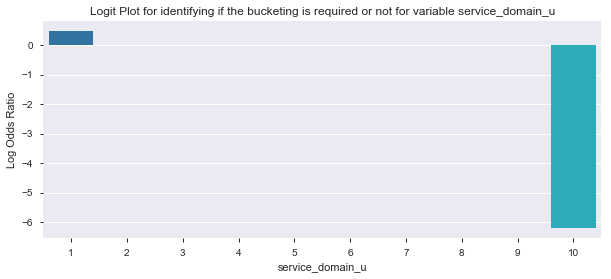

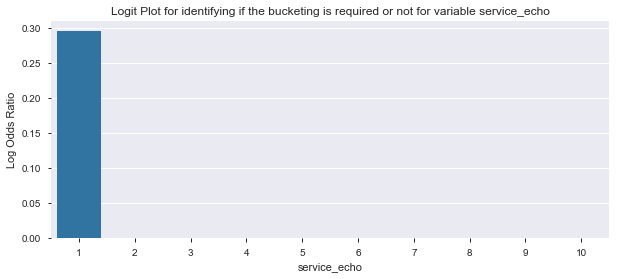

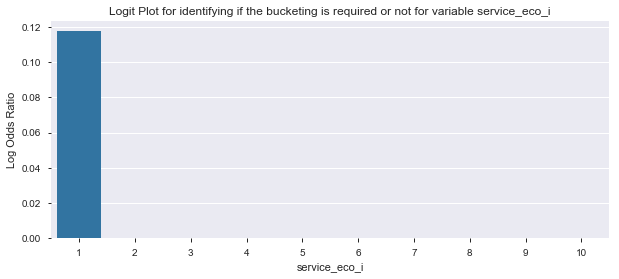

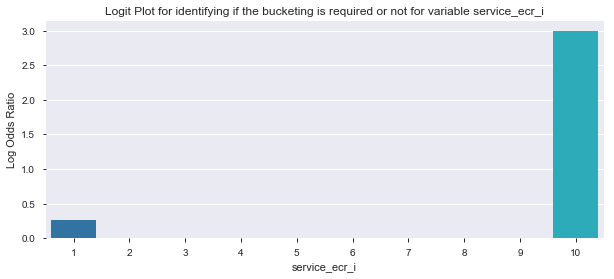

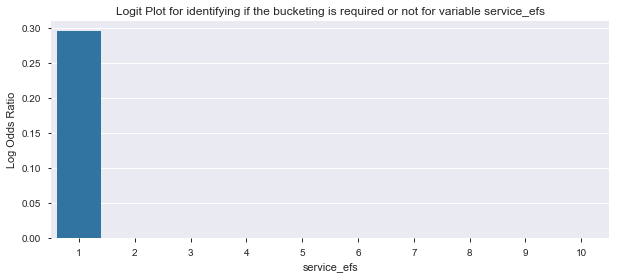

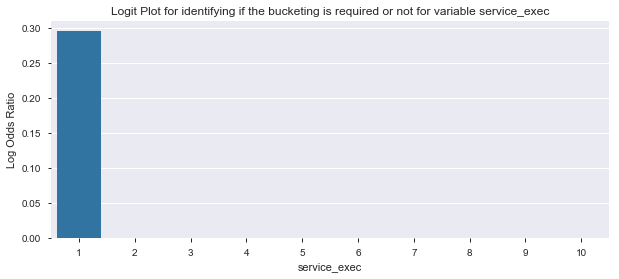

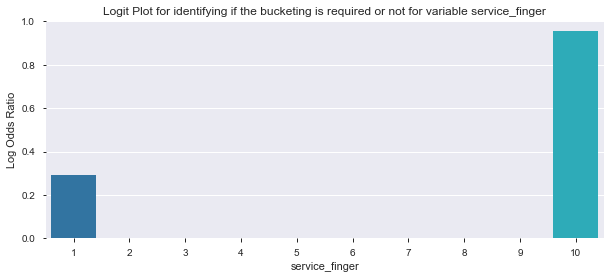

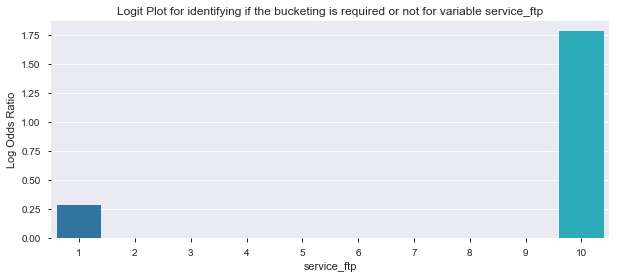

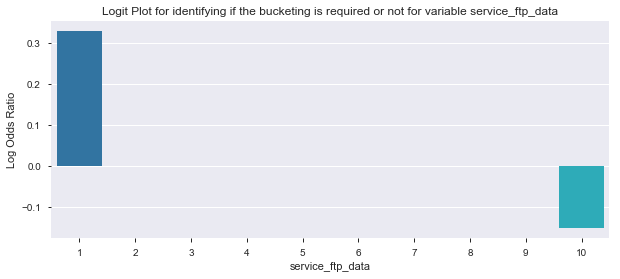

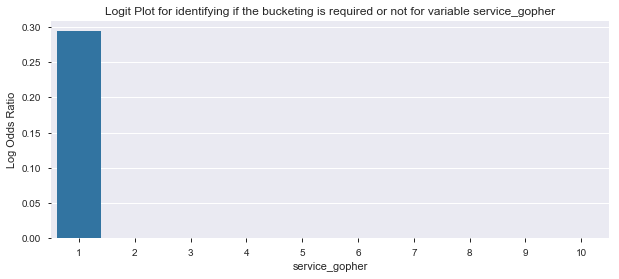

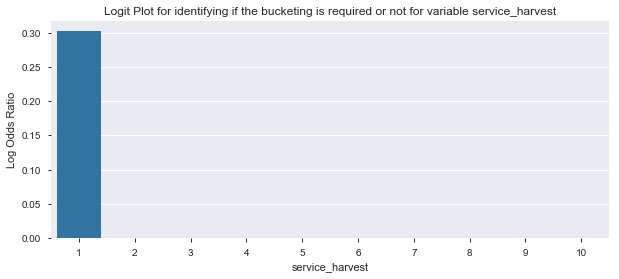

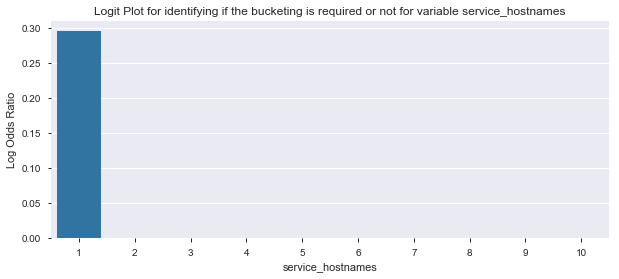

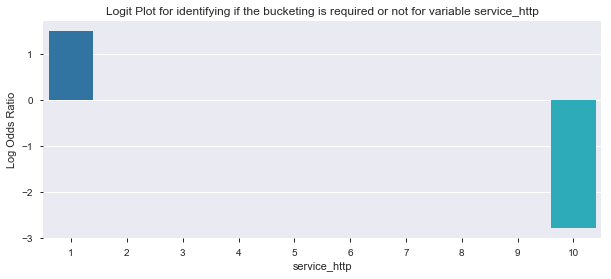

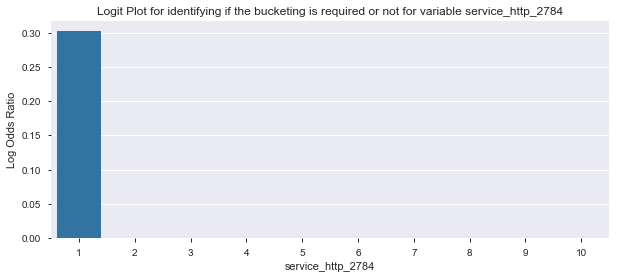

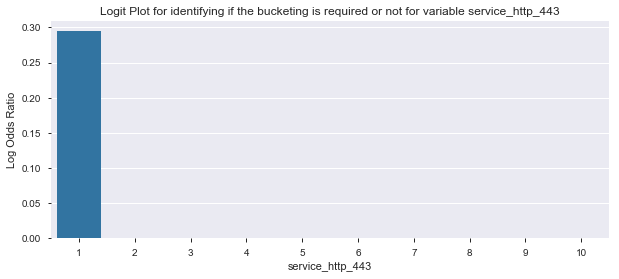

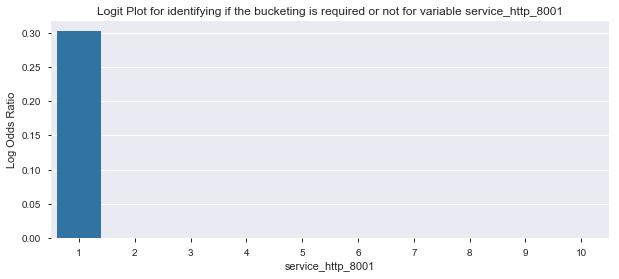

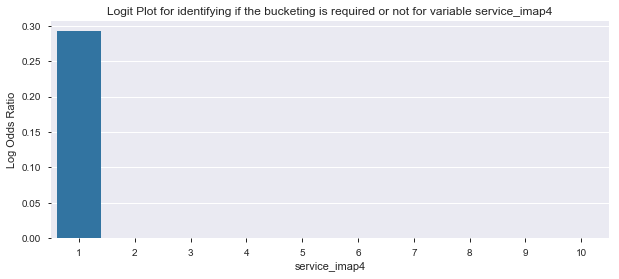

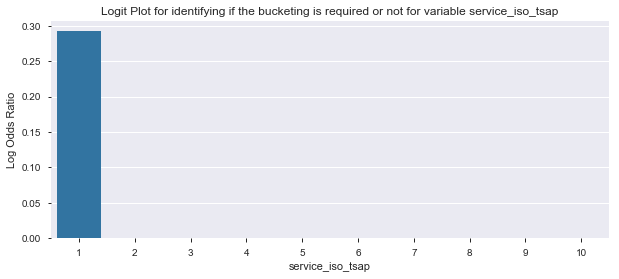

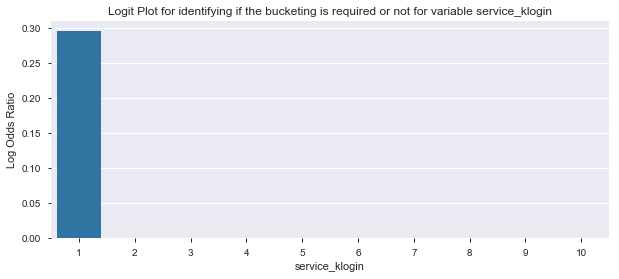

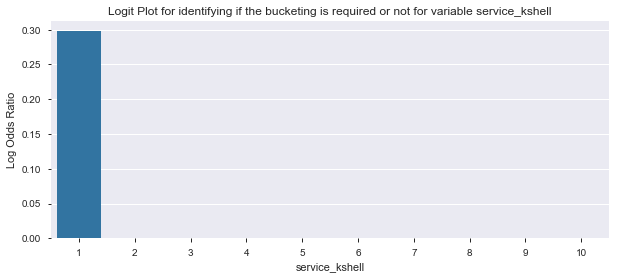

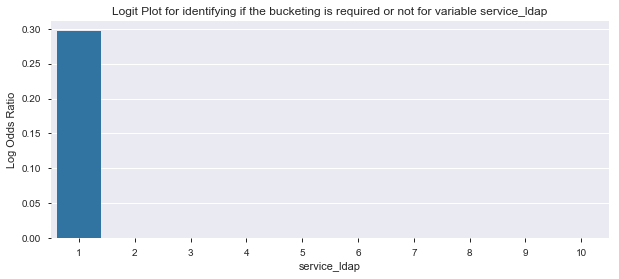

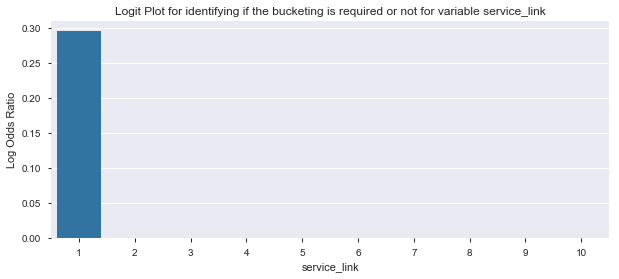

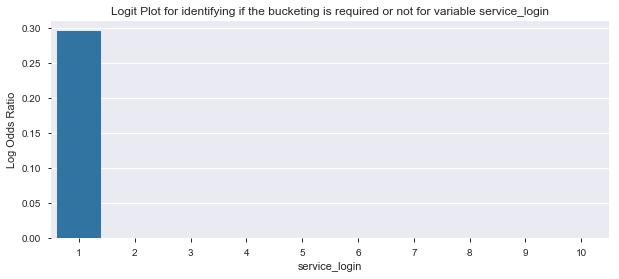

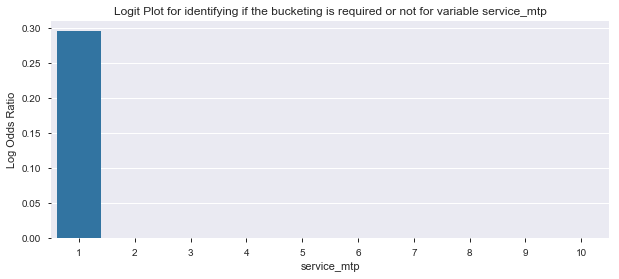

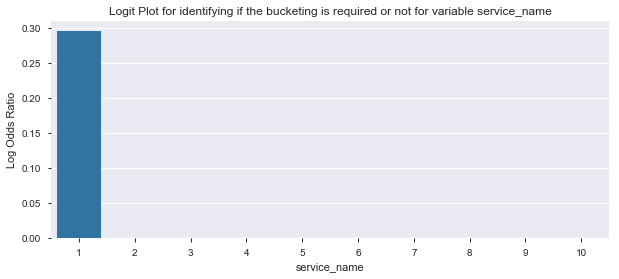

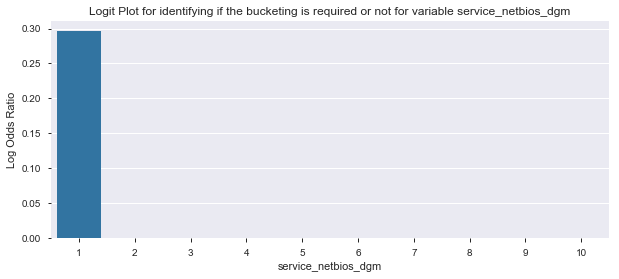

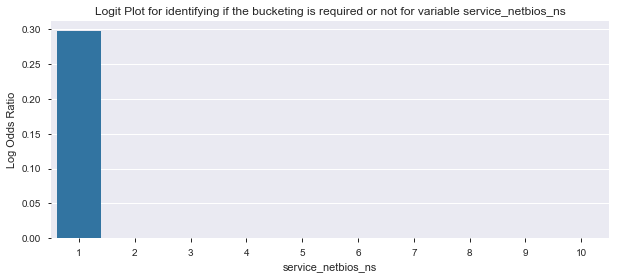

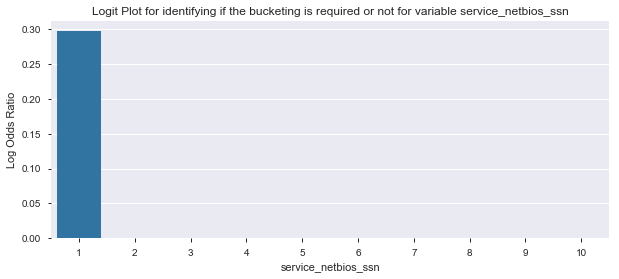

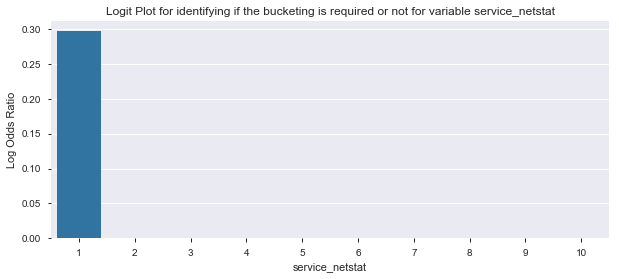

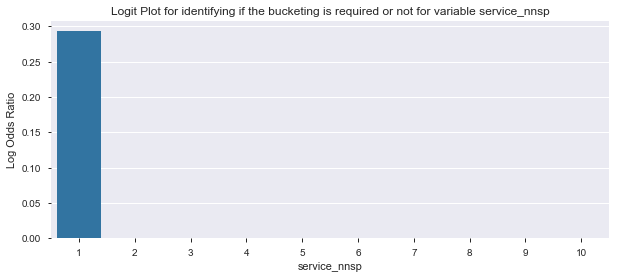

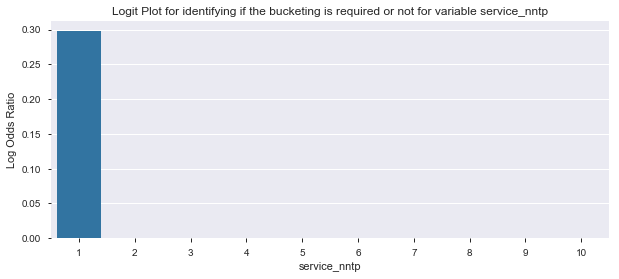

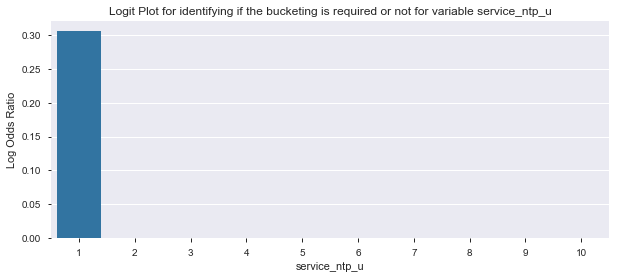

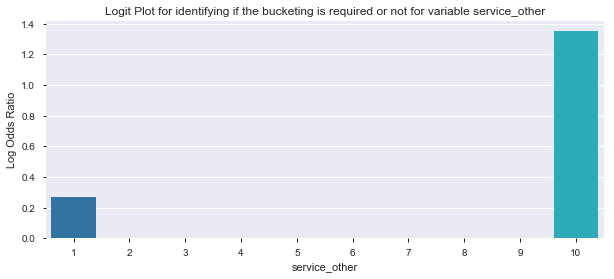

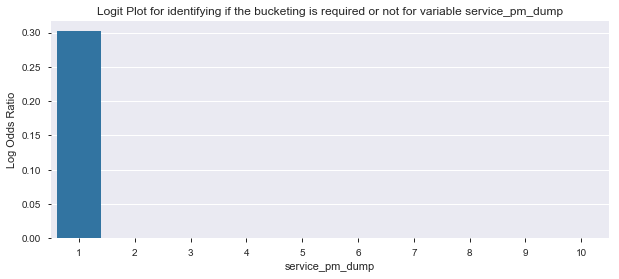

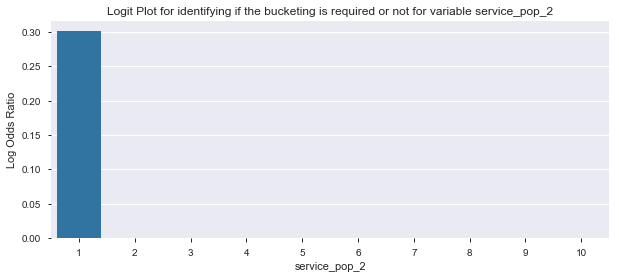

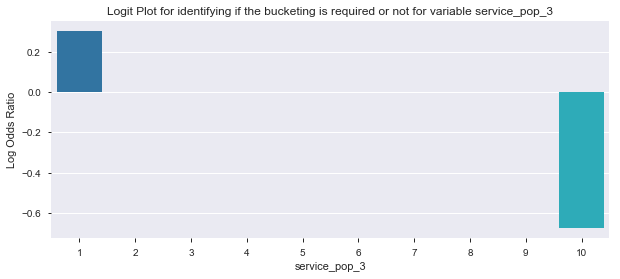

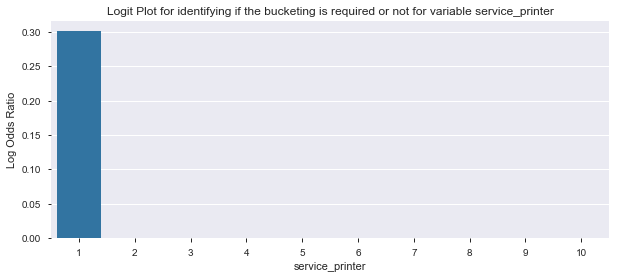

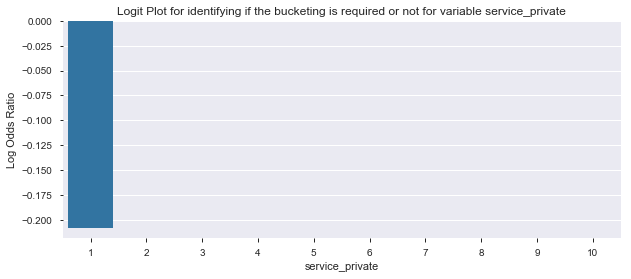

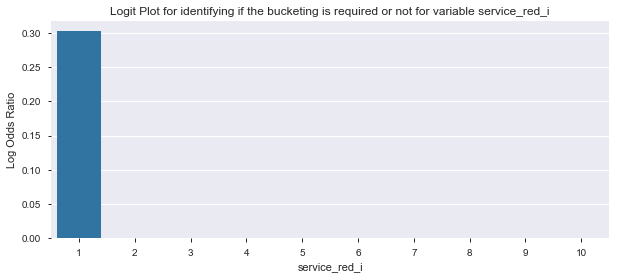

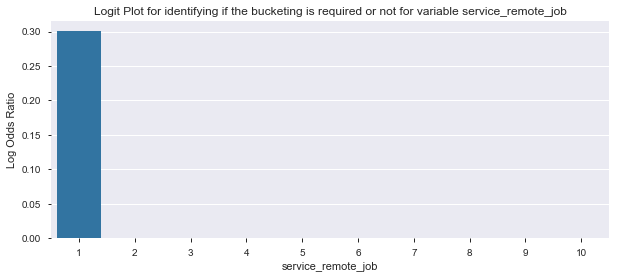

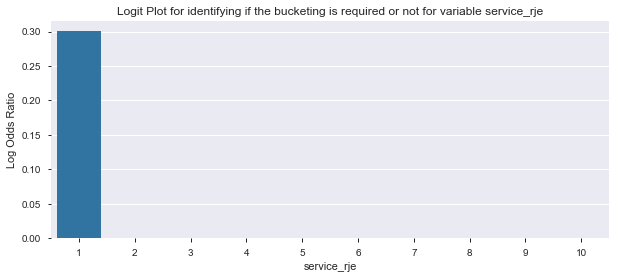

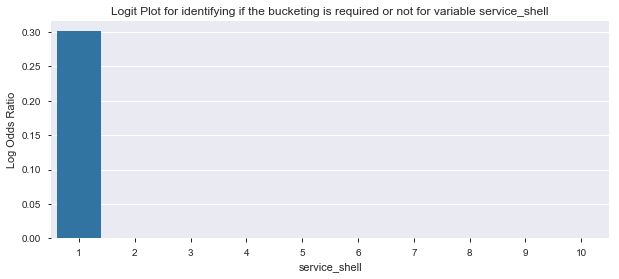

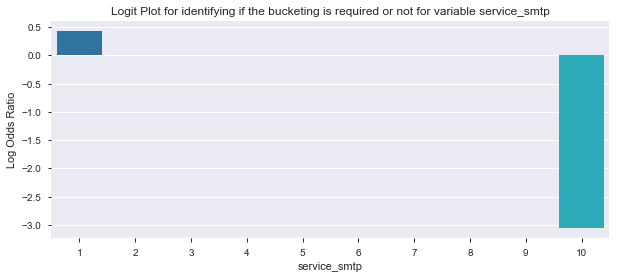

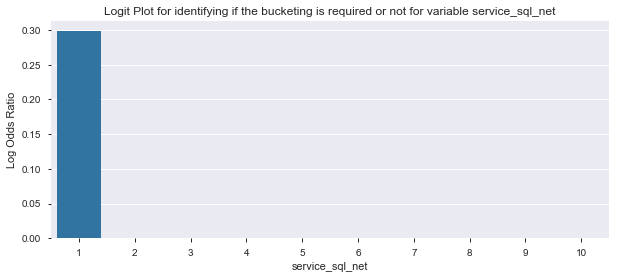

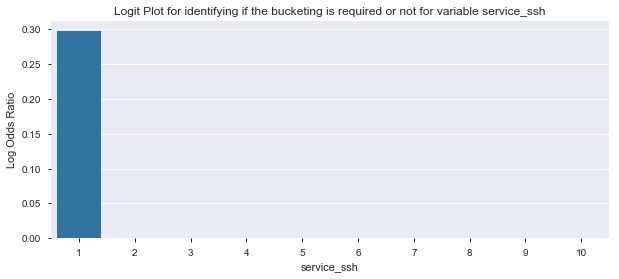

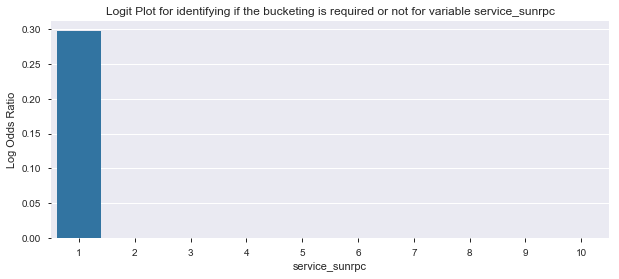

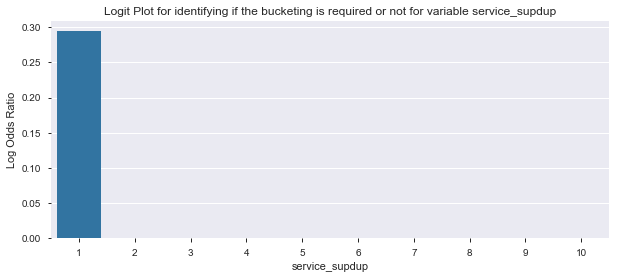

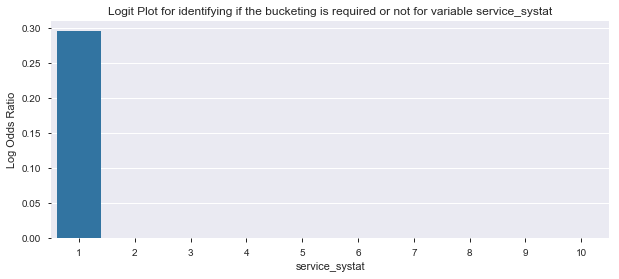

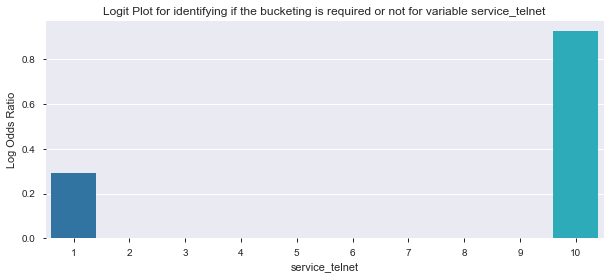

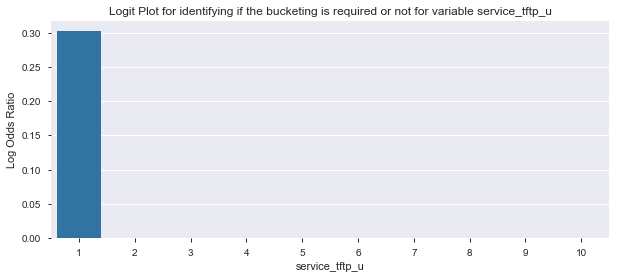

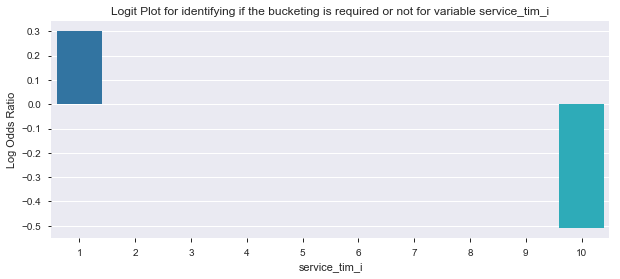

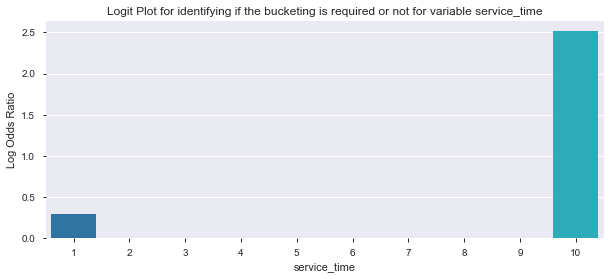

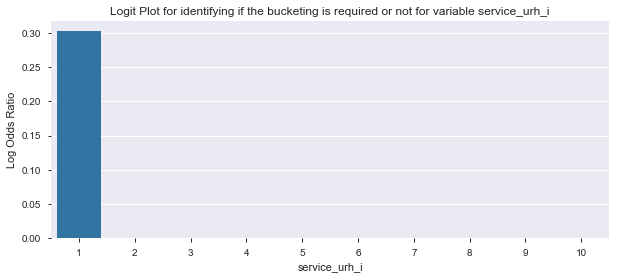

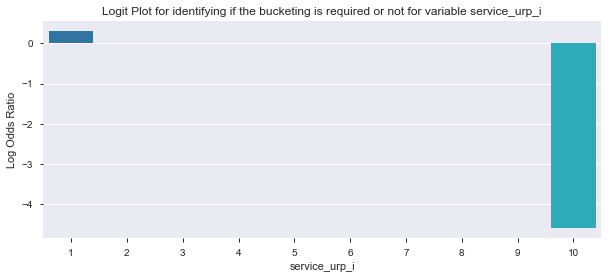

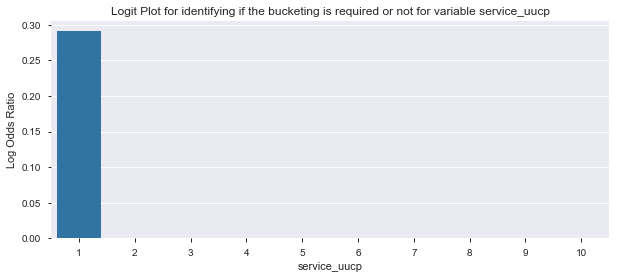

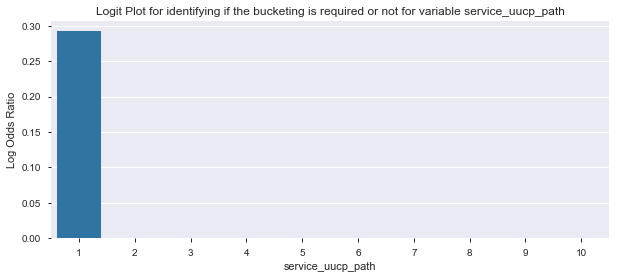

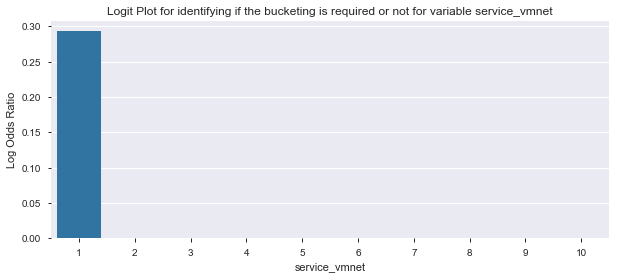

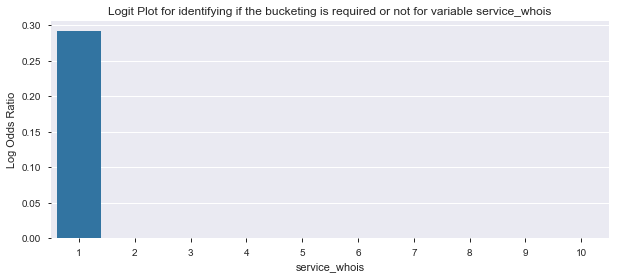

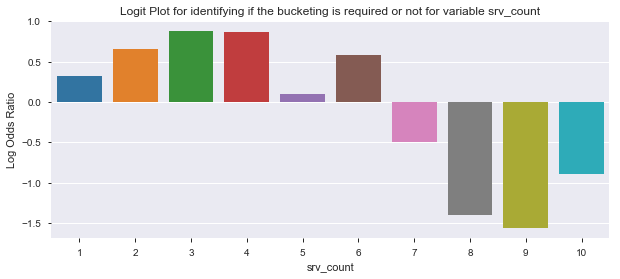

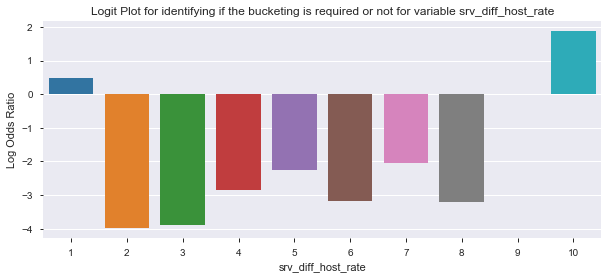

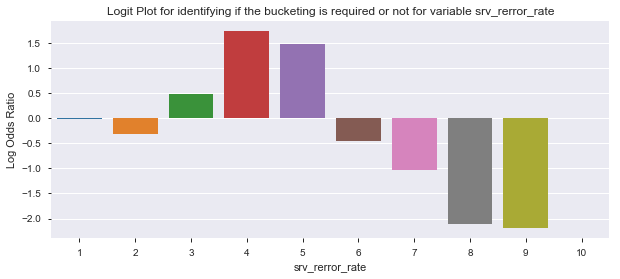

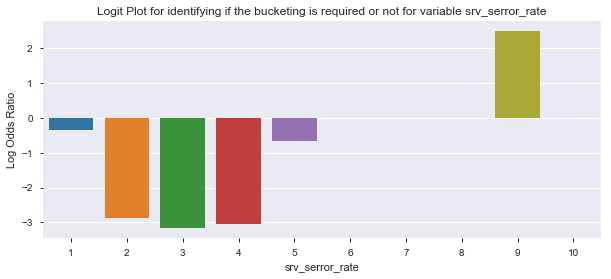

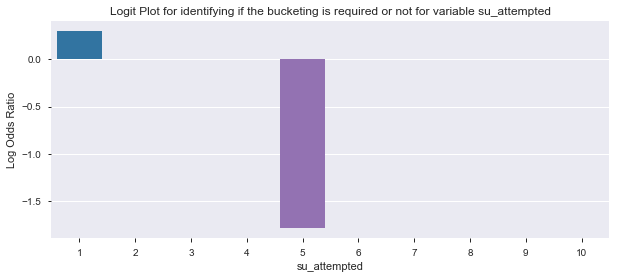

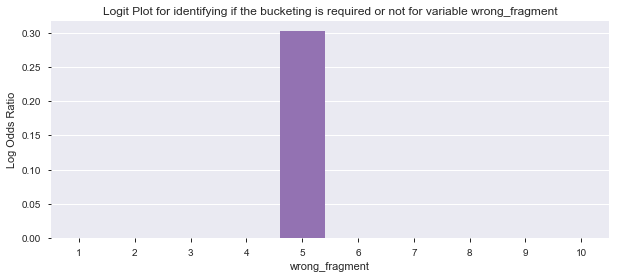

In [36]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()


bp = PdfPages('Transformation Plots.pdf')

for num_variable in train_set.columns.difference(['attack']):
    binned = pd.cut(train_set[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = train_set.groupby(binned)['attack'].sum() / (train_set.groupby(binned)['attack'].count()-train_set.groupby(binned)['attack'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

<b>WOE & IV

In [37]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [38]:
final_iv, IV = data_vars(train_set,train_set.attack)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in log
C:\Users\Aanchal\Anaconda3\lib\site-pack

In [39]:
final_iv

VAR_NAME  MIN_VALUE  MAX_VALUE   COUNT  EVENT  \
0                       duration       0.00       1.00  117943  68703   
1                       duration       2.00       4.00    8029   3729   
2                      Src_bytes       0.00      44.00   64335  65081   
3                      Src_bytes      45.00    1480.00   61637   7351   
4                      dst_bytes       0.00       1.00   67988  69678   
5                      dst_bytes       3.00    8314.00   57984   2754   
6                 wrong_fragment       0.00       0.00  125972  72432   
7                          count       1.00      14.00   63068  22013   
8                          count      15.00     286.00   62904  50419   
9                      srv_count       1.00       8.00   66573  37296   
10                     srv_count       9.00     158.00   59399  35136   
11               srv_serror_rate       0.00       1.00  125972  72432   
12               srv_rerror_rate       0.00       1.00  125972  72432   
13                 same_srv_rate       0.01       1.00  125972  72432   
14                 diff_srv_rate       0.00       0.29  125972  72432   
15                 diff_srv_rate        NaN        NaN       0      0   
16            srv_diff_host_rate       0.00       1.00  125972  72432   
17                dst_host_count        NaN        NaN       0      0   
18                dst_host_count       3.00     255.00  125972  72432   
19            dst_host_srv_count       1.00      16.00   42517  43773   
20            dst_host_srv_count      17.00     238.00   41559  26985   
21            dst_host_srv_count     239.00     255.00   41896   1674   
22        dst_host_same_srv_rate       0.00       0.51   63007  58216   
23        dst_host_same_srv_rate       0.52       1.00   62965  14216   
24        dst_host_diff_srv_rate       0.00       0.02   63000  16353   
25        dst_host_diff_srv_rate       0.03       0.56   62972  56079   
26   dst_host_same_src_port_rate       0.00       1.00  125972  72432   
27   dst_host_srv_diff_host_rate       0.00       0.18  125972  72432   
28   dst_host_srv_diff_host_rate        NaN        NaN       0      0   
29          dst_host_serror_rate       0.00       1.00  125972  72432   
..                           ...        ...        ...     ...    ...   
178               service_tftp_u       1.00       1.00       3      0   
179                service_tim_i       0.00       0.00  125964  72429   
180                service_tim_i       1.00       1.00       8      3   
181                 service_time       0.00       0.00  125318  71827   
182                 service_time       1.00       1.00     654    605   
183                service_urh_i       0.00       0.00  125962  72432   
184                service_urh_i       1.00       1.00      10      0   
185                service_urp_i       0.00       0.00  125370  72426   
186                service_urp_i       1.00       1.00     602      6   
187                 service_uucp       0.00       0.00  125192  71641   
188                 service_uucp       1.00       1.00     780    791   
189            service_uucp_path       0.00       0.00  125283  71730   
190            service_uucp_path       1.00       1.00     689    702   
191                service_vmnet       0.00       0.00  125355  71804   
192                service_vmnet       1.00       1.00     617    628   
193                service_whois       0.00       0.00  125279  71716   
194                service_whois       1.00       1.00     693    716   
195                         land       0.00       0.00  125947  72414   
196                         land       1.00       1.00      25     18   
197                    logged_in       0.00       0.00   76120  68398   
198                    logged_in       1.00       1.00   49852   4034   
199                   root_shell       0.00       0.00  125803  72310   
200                   root_shell       1.00       1.00     169    122   
201      

In [40]:
IV_VAL=IV.sort_values('IV')
IV_VAL.sort_values(by=['IV'])
IV_values= IV_VAL.sort_values(by='IV', ascending=False)
IV_values

VAR_NAME            IV
27                     logged_in  3.689310e+00
3                      dst_bytes  3.279360e+00
55                  service_http  2.915056e+00
26                     last_flag  2.819066e+00
8         dst_host_same_srv_rate  2.663960e+00
17                       flag_S0  2.607869e+00
10            dst_host_srv_count  2.566451e+00
0                      Src_bytes  2.100129e+00
5         dst_host_diff_srv_rate  2.029696e+00
43              service_domain_u  1.128390e+00
21                       flag_SF  1.028339e+00
1                          count  9.346449e-01
85                  service_smtp  4.407865e-01
80               service_private  2.189336e-01
29             protocol_type_udp  1.995380e-01
46                 service_ecr_i  1.028868e-01
14                     flag_RSTO  6.562446e-02
96                 service_urp_i  5.427074e-02
75                 service_other  3.361857e-02
45                 service_eco_i  3.325237e-02
13                      flag_REJ  2.808851e-02
18                       flag_S1  2.796414e-02
28             protocol_type_tcp  2.772814e-02
42                service_domain  2.442100e-02
50                   service_ftp  2.390790e-02
94                  service_time  1.650120e-02
12                      duration  1.371092e-02
51              service_ftp_data  1.204646e-02
16                     flag_RSTR  1.009114e-02
23                is_guest_login  8.798703e-03
..                           ...           ...
15                   flag_RSTOS0  2.274283e-05
73                  service_nntp  2.096218e-05
62                service_kshell  1.900841e-05
86               service_sql_net  1.425386e-05
74                 service_ntp_u  9.861525e-06
83                   service_rje  3.141807e-06
82            service_remote_job  2.762209e-06
77                 service_pop_2  1.787806e-06
79               service_printer  1.393048e-06
84                 service_shell  1.055867e-06
76               service_pm_dump  5.356967e-08
95                 service_urh_i  3.488862e-08
81                 service_red_i  2.232830e-08
53               service_harvest  8.571033e-09
34                   service_aol  8.571033e-09
58             service_http_8001  8.571033e-09
92                service_tftp_u  3.139771e-09
56             service_http_2784  2.142749e-09
24                 is_host_login  3.488569e-10
103              srv_rerror_rate  0.000000e+00
4                 dst_host_count  0.000000e+00
6           dst_host_rerror_rate  0.000000e+00
2                  diff_srv_rate  0.000000e+00
102           srv_diff_host_rate  0.000000e+00
104              srv_serror_rate  0.000000e+00
7    dst_host_same_src_port_rate  0.000000e+00
9           dst_host_serror_rate  0.000000e+00
11   dst_host_srv_diff_host_rate  0.000000e+00
31                 same_srv_rate  0.000000e+00
106               wrong_fragment  0.000000e+00

[107 rows x 2 columns]

In [41]:
IV_values[IV_values['IV']>0.02]

VAR_NAME        IV
27               logged_in  3.689310
3                dst_bytes  3.279360
55            service_http  2.915056
26               last_flag  2.819066
8   dst_host_same_srv_rate  2.663960
17                 flag_S0  2.607869
10      dst_host_srv_count  2.566451
0                Src_bytes  2.100129
5   dst_host_diff_srv_rate  2.029696
43        service_domain_u  1.128390
21                 flag_SF  1.028339
1                    count  0.934645
85            service_smtp  0.440787
80         service_private  0.218934
29       protocol_type_udp  0.199538
46           service_ecr_i  0.102887
14               flag_RSTO  0.065624
96           service_urp_i  0.054271
75           service_other  0.033619
45           service_eco_i  0.033252
13                flag_REJ  0.028089
18                 flag_S1  0.027964
28       protocol_type_tcp  0.027728
42          service_domain  0.024421
50             service_ftp  0.023908

These are the varibles selected by IV

<b>Variable Reduction by K_Best

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [43]:
X = train_set[train_set.columns.difference(['attack'])]
X_new = SelectKBest(f_classif, k=12).fit(X, train_set[['attack']] )

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [106] are constant.
  UserWarning)
C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [44]:
X_new.get_support()

array([False,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False])

In [45]:
X_new.scores_

array([5.47210591e+03, 3.00440051e+04, 6.59596998e+03, 4.74767182e+03,
       9.43696431e+03, 1.15884278e+04, 3.81960815e+03, 1.37785525e+04,
       3.41058705e+04, 5.21211256e+04, 3.46257821e+04, 7.35612465e+03,
       1.63601785e+03, 1.66050532e+03, 3.34946711e+02, 2.54784053e+02,
       5.65935162e+03, 5.51308797e+04, 7.62272958e+01, 2.08990591e+01,
       1.29551542e+01, 5.68123276e+04, 6.48704199e+02, 2.88231817e+03,
       2.17652221e-01, 3.55448797e+00, 1.89276523e+04, 3.19608083e+04,
       3.07926970e+03, 1.93983363e+03, 2.64745490e+03, 6.82373705e+04,
       1.18510234e+01, 3.67695514e+02, 4.90438745e+00, 1.45872774e+02,
       2.99329576e+02, 3.14041606e+02, 2.24448213e+02, 2.17228139e+02,
       2.06617859e+02, 2.14116711e+02, 1.74182975e+02, 2.26310868e+03,
       1.68411340e+02, 1.27168376e+04, 1.10375147e+03, 2.04153607e+02,
       1.96715627e+02, 1.74112996e+02, 1.75688927e+03, 2.05188327e+03,
       1.89466686e+02, 4.90438745e+00, 1.85600381e+02, 1.46152878e+04,
      

In [46]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, X_new.get_support())]

feature_map

#Alternative of capturing the important variables
KBest_features=X.columns[X_new.get_support()]

selected_features_from_KBest = X[KBest_features]

In [47]:
KBest_features

Index(['count', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count', 'flag_S0', 'flag_SF',
       'last_flag', 'logged_in', 'same_srv_rate', 'service_http',
       'srv_serror_rate'],
      dtype='object')

<b>Variable Reduction using Recursive Feature Elimination

In [48]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = train_set[train_set.columns.difference(['attack'])]
logreg = LogisticRegression()
rfe = RFE(logreg, 12)
rfe = rfe.fit(X, train_set[['attack']] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False  True False False  True False False False False False  True
 False False False False False  True False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False  True False  True  True False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True False False]
[91 82  1 95 90  1 17  4 11 14 89  1 76  9 16 23 27  1  6 78 29  2 26  5
 94 18 30 19 20  3 21  1 28 42 86 74 38 51 52 57 73 70 25  1 65  1  1 49
 63 80 32 13 44 84 56  1 88 41 83 12 48 61 64 45 69 33 66 77 53 54 62 58
 37 36 34  8 81 60 79 72  1 93 35 46 85 15 55 43 71 67 68 10 31 39 75 92
  7 47 40 50 59 87 22  1  1 24 96]


In [49]:
X.columns

Index(['Src_bytes', 'count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate',
       ...
       'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois',
       'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rate',
       'su_attempted', 'wrong_fragment'],
      dtype='object', length=107)

In [50]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [51]:
RFE_features

Index(['diff_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'flag_S0', 'same_srv_rate',
       'service_domain_u', 'service_eco_i', 'service_ecr_i', 'service_http',
       'service_private', 'srv_rerror_rate', 'srv_serror_rate'],
      dtype='object')

<b>Variable Reduction using Recursive Feature Elimination

-Calculating VIF for the features selected by RFE, K_Best and IV

In [52]:
## Variance Inflation Factor assessment
X = pd.concat([train_set[train_set.columns.difference(['attack'])],train_set['attack']], axis=1)
features = "+".join(train_set.columns.difference(['attack']))
X.head()

Src_bytes  count  diff_srv_rate  dst_bytes  dst_host_count  \
0      146.0   13.0           0.15        0.0           255.0   
1        0.0  123.0           0.07        0.0           255.0   
2      232.0    5.0           0.00     8153.0            30.0   
3      199.0   30.0           0.00      420.0           255.0   
4        0.0  121.0           0.06        0.0           255.0   

   dst_host_diff_srv_rate  dst_host_rerror_rate  dst_host_same_src_port_rate  \
0                    0.56                   0.0                         0.88   
1                    0.05                   0.0                         0.00   
2                    0.00                   0.0                         0.03   
3                    0.00                   0.0                         0.00   
4                    0.07                   1.0                         0.00   

   dst_host_same_srv_rate  dst_host_serror_rate   ...    service_uucp_path  \
0                    0.00                  0.00   ...                    0   
1                    0.10                  1.00   ...                    0   
2                    1.00                  0.03   ...                    0   
3                    1.00                  0.00   ...                    0   
4                    0.07                  0.00   ...                    0   

   service_vmnet  service_whois  srv_count  srv_diff_host_rate  \
0              0              0        1.0                0.00   
1              0              0        6.0                0.00   
2              0              0        5.0                0.00   
3              0              0       32.0                0.09   
4              0              0       19.0                0.00   

   srv_rerror_rate  srv_serror_rate  su_attempted  wrong_fragment  attack  
0              0.0              0.0             0             0.0       0  
1              0.0              1.0             0             0.0       1  
2              0.0              0.2             0             0.0       0  
3              0.0              0.0             0             0.0       0  
4              1.0              0.0             0             0.0       1  

[5 rows x 108 columns]

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

a,b = dmatrices(formula_like='attack ~ '+ 'diff_srv_rate+dst_host_diff_srv_rate+dst_host_srv_diff_host_rate+flag_S0+same_srv_rate+service_domain_u+service_eco_i+service_ecr_i+service_http+service_private+srv_rerror_rate+srv_serror_rate+count+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_serror_rate+dst_host_srv_count+flag_SF+logged_in+dst_bytes+Src_bytes+service_smtp+protocol_type_udp+flag_RSTO+service_urp_i+service_other+flag_REJ+flag_S1+protocol_type_tcp+service_domain+service_ftp',data= X,return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

print(vif)

     VIF Factor                     features
0   5255.211131                    Intercept
1     13.561985               logged_in[T.1]
2      2.660789                diff_srv_rate
3      2.892873       dst_host_diff_srv_rate
4      2.536687  dst_host_srv_diff_host_rate
5     55.985118                      flag_S0
6     13.908943                same_srv_rate
7      4.802656             service_domain_u
8    172.549283                service_eco_i
9    117.317084                service_ecr_i
10     7.946319                 service_http
11     1.727935              service_private
12    35.828160              srv_rerror_rate
13    72.957351              srv_serror_rate
14     3.675374                        count
15     3.282935  dst_host_same_src_port_rate
16    13.011029       dst_host_same_srv_rate
17    29.658171         dst_host_serror_rate
18     8.556158           dst_host_srv_count
19    78.359728                      flag_SF
20     1.645576                    dst_bytes
21     2.9

# Logistic Regression Model Building using sklearn

In [54]:
X_train= selected_features_from_KBest
y_train = train_set['attack']

x_test=test_set[['count','dst_host_same_src_port_rate','dst_host_same_srv_rate','dst_host_serror_rate','dst_host_srv_count','flag_S0','flag_SF','last_flag','logged_in','same_srv_rate','service_http','srv_serror_rate']]
y_test= test_set['attack']  

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [56]:
#params = {'C':[0.001, 0.01, 0.1, 1,10, 50, 100], 'tol': [0.001, 0.0001, 0.005]}
logreg= LogisticRegression(solver='newton-cg', multi_class='multinomial',random_state= 2)

In [57]:
logreg.fit(X_train, y_train)

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=2, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Predictions on test data

In [65]:
y_pred=logreg.predict(x_test)

In [66]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': logreg.predict( x_test ) } )

In [67]:
test_pred = test_pred.reset_index()

In [68]:
#Comparing the predictions with actual test data
test_pred.sample( n = 10 )

index  actual  predicted
22413  22413       0          0
11705  11705       2          2
4037    4037       1          0
19201  19201       2          2
2143    2143       0          0
8887    8887       3          0
8840    8840       1          1
12083  12083       1          0
8279    8279       0          0
12192  12192       0          0

In [69]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted)
cm

array([[8861,  523,  106,   55,  166],
       [1131, 5800,  138,  379,   11],
       [  44,  828, 1274,  239,   36],
       [ 956,   18,  336, 1261,  314],
       [   0,    0,    4,   17,   46]], dtype=int64)

<b>Overall Accuracy on test data

In [70]:
score = metrics.accuracy_score(test_pred.actual,test_pred.predicted )
Logistic_accuracy=round( float(score), 2 )
Logistic_accuracy

0.76

In [71]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual attack'], colnames=['Predicted attack']))

Predicted attack     0     1     2     3    4
Actual attack                                
0                 8861   523   106    55  166
1                 1131  5800   138   379   11
2                   44   828  1274   239   36
3                  956    18   336  1261  314
4                    0     0     4    17   46


<b>Plotting overall Accuracy with Confusion Matrix

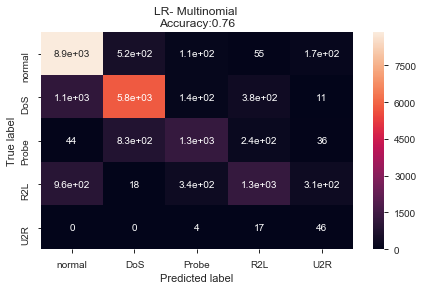

In [72]:
cm_df = pd.DataFrame(cm,
                     index = ['normal','DoS','Probe','R2L','U2R'], 
                     columns = ['normal','DoS','Probe','R2L','U2R'])

plt.figure(figsize=(7,4))
sns.heatmap(cm_df, annot=True)
plt.title('LR- Multinomial \nAccuracy:{0:.2f}'.format(score))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<b>Classwise Precision, recall, F-measure and support:
 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R

In [73]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86      9711
          1       0.81      0.78      0.79      7459
          2       0.69      0.53      0.60      2421
          3       0.65      0.44      0.52      2885
          4       0.08      0.69      0.14        67

avg / total       0.77      0.76      0.76     22543



In [74]:
#Predicted probability of test set
logreg.predict_proba(x_test)[:,1]

array([7.37706411e-01, 5.35999375e-03, 2.35959419e-02, ...,
       1.76180096e-01, 2.89862818e-04, 4.58658520e-02])

<b>In this problem the model overall accuracy on the test set was 76% (Accurate predictions/All or True Positives/All)

# Model Building by SVM

In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [76]:
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
param_grid = {'C': [1, 5, 10, 50,70],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid,cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50, 70], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [78]:
print(grid.best_params_)

{'C': 70, 'gamma': 0.005}


In [79]:
model = grid.best_estimator_
yfit = model.predict(x_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))


             precision    recall  f1-score   support

          0       0.77      0.96      0.85      9711
          1       0.87      0.75      0.81      7459
          2       0.55      0.49      0.52      2421
          3       0.61      0.29      0.40      2885
          4       0.07      0.43      0.12        67

avg / total       0.76      0.75      0.74     22543



<b>Calculating overall Model accuracy 

In [83]:
SVC_accuracy= metrics.accuracy_score( y_test, yfit )
SVC_accuracy

0.7529610078516613

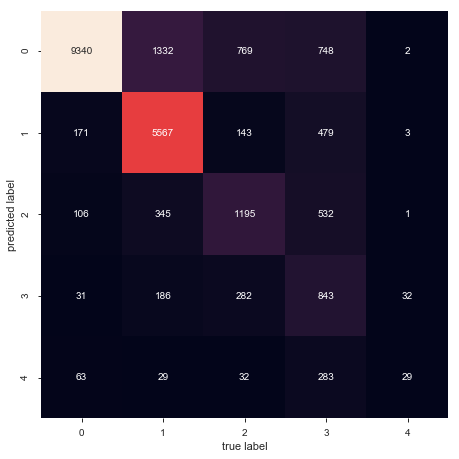

In [82]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Building Model by Naive Bayes

In [187]:
import sklearn.naive_bayes as nb

In [188]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn
from sklearn.grid_search import GridSearchCV

In [189]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [190]:
yfit= nb_clf.predict( x_test )

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

             precision    recall  f1-score   support

          0       0.76      0.89      0.82      9711
          1       0.84      0.51      0.63      7459
          2       0.25      0.60      0.35      2421
          3       0.78      0.17      0.28      2885
          4       0.00      0.00      0.00        67

avg / total       0.73      0.64      0.64     22543



<b>Confusion Matrix

In [192]:
nb_cm = metrics.confusion_matrix(y_test,nb_clf.predict(x_test) )
nb_cm

array([[8679,   22,  984,   18,    8],
       [1329, 3786, 2298,   36,   10],
       [  99,  683, 1448,   79,  112],
       [1279,    8, 1071,  485,   42],
       [  24,    2,   39,    2,    0]], dtype=int64)

<b>Calculating overall accuracy of this Model

In [195]:
nb_accuracy= metrics.accuracy_score( y_test, yfit)

In [196]:
nb_accuracy

0.6386905025950406

In [202]:
#Predicted probability of test set
nb_clf.predict_proba(x_test)[:,1]

array([5.14566099e-01, 4.44636331e-10, 5.78002673e-23, ...,
       1.06204274e-28, 1.33433441e-15, 4.41398295e-05])

# Model Accuracies

In [199]:
first_model = {'Model': ['Multinomial LR', 'SVC', 'NB'],
               'accuracy' : [Logistic_accuracy,SVC_accuracy, nb_accuracy]}

result_df = pd.DataFrame(data = first_model)
result_df

Model  accuracy
0  Multinomial LR  0.760000
1             SVC  0.752961
2              NB  0.638691

[Text(0,0,'Multinomial LR'), Text(0,0,'SVC'), Text(0,0,'NB')]

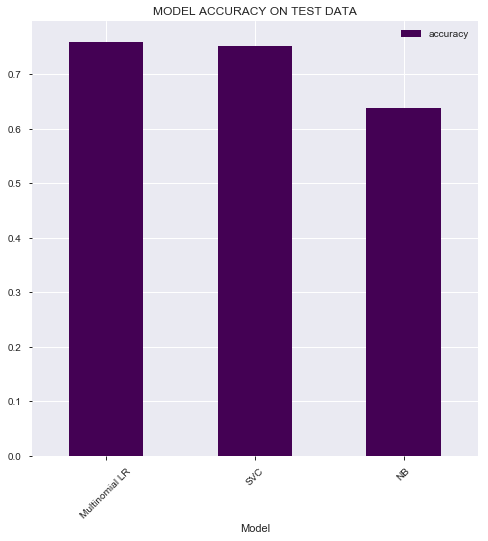

In [200]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='MODEL ACCURACY ON TEST DATA', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

<b> It is noted that this model is achieving highest accuracy with Multinomial LR and able to make high number of correct predictions.

<b> The overall accuracy rate in detecting normal and attack class of network connection is shown in above graph.